# DATA SCIENCE APLICADA | ANÁLISE DE SÉRIES TEMPORAIS
***



**DESAFIO - MÓDULO 04**

Neste projeto do módulo 4 vamos trabalhar com a base de dados de casos de COVID-19, os impactos desta pandemia trouxe e ainda pode trazer consequências sem precedentes na sociedade moderna.

O foco deste projeto será analisar os casos de COVID-19 em uma perspectiva de Séries Temporais. Convidamos você a realizar uma análise dos dados, discutir suas estatísticas e desenvolver um modelo preditivo para prever o número de casos. Esse será os objetivos principais do projeto, mas sita-se livre para ir além do que estamos pedindo, o DATASUS tem muitas informações além dos número de casos e óbitos.

- Os dados atualizados oficialmente pelo Ministério do Saúde você acessa por este link.

- Dados relacionados a SRAG para enriquecer sua análise você encontra neste link

- Neste link você encontra várias outras informações relacionadas a COVID-19 para inspirar suas análises.

# O PROJETO

<b> <p>&#128187; Temática:</p></b> 

Há algumas semanas o estado do Amazonas e mais especificamente a capital Manaus, foi palco de uma triste realidade: a fala de leitos e oxigênio nos hospitais para tratamento dos pacientes com Coronavirus.

Assim, este notebook consiste em analisar as contaminações de COVID-19 no Brasil, diferenciando Amazonas das demais unidades federativas.

<b> <p>&#127922; Dados:</p></b> 

Para embasar as análises foram utilizados os seguintes datasets (maiores detalhes nas seções seguintes):

- COVID-19
- Projeção populacional
- Recursos Físicos: Quantidade de leitos
- Procedimentos hospitalares: Quantidade de internações

<b> <p>&#128202; Como o notebook está organizado:</p></b>

Ao longo do notebook há análises do Brasil (excluindo AM) e análises específicas do estado do Amazonas.


Para facilitar a visualização, os gráficos que se referem ao Brasil estão na tonalidade<b><font color="blue"> azul </font> </b> enquanto Amazonas está na tonalidade <b><font color="orange"> laranja </font></b>.


<b><font color="Blue"> Brasil </font></b>
<img src="https://i.ibb.co/J3vBYYz/Whats-App-Image-2021-01-21-at-15-12-48.jpg" alt="Whats-App-Image-2021-01-21-at-15-12-48" width="150" height="150" data-load="full" style="" align="left">

<br>&nbsp;  &nbsp; 
<br>
&nbsp;  &nbsp;
<br>
&nbsp;  &nbsp;
<br>
<b><font color="Orange"> Amazonas </font></b>


<img src="https://i.ibb.co/n3GQ8Pz/Whats-App-Image-2021-01-21-at-15-12-55.jpg" alt="Whats-App-Image-2021-01-21-at-15-12-55" width="150" height="150" data-load="full" style="" align="left"> <br> <br> <br> <br> <br>


<br> <br> <br> <b><p>&#128221; Conteúdo:</p></b>

**1. Importação das bibliotecas<br>**
<br>
**2. Importação dos datasets<br>**
<br>
**3. Análises Macros<br>**
<br>
**4. Análise de Séries Temporais<br>**
&nbsp;&nbsp;&nbsp;&nbsp;   4.1. Média Móvel <br>
&nbsp;&nbsp;&nbsp;&nbsp;    4.2. Decomposição da série temporal<br>
&nbsp;&nbsp;&nbsp;&nbsp;   4.3. Teste de estacionariedade<br>
&nbsp;&nbsp;&nbsp;&nbsp;    4.4. Autocorrelação<br>
&nbsp;&nbsp;&nbsp;&nbsp;    4.5. Previsões de séries temporais<br>
<br>
**5. Previsóes de séries temporais<br>**
&nbsp;&nbsp;&nbsp;&nbsp;    5.1. Holt Winters <br>
&nbsp;&nbsp;&nbsp;&nbsp;    5.2. Arima <br>
&nbsp;&nbsp;&nbsp;&nbsp;    5.3. Sarima <br>
&nbsp;&nbsp;&nbsp;&nbsp;    5.4 Phophet <br>
**6. Previsões para Amazonas**
&nbsp;&nbsp;&nbsp;&nbsp;    6.1. Internações<br>
&nbsp;&nbsp;&nbsp;&nbsp;    6.2. Leitos<br>
&nbsp;&nbsp;&nbsp;&nbsp;    6.3. COVID<br>

<br>


<b> <p>&#128172; Contatos:</p></b>  
- <b>  <a href="https://www.linkedin.com/in/daiane-klein/">Linkedin</a></b> 

- <b>  <a href="https://github.com/daianeklein/bootcamp-Alura/blob/main/Desafio-Modulo4.ipynb">Github</a></b> 

## IMPORTAÇÃO DAS LIB's

In [1]:
import os 

import pandas                      as pd 
import seaborn                     as sns
import numpy                       as np

import matplotlib
import matplotlib.pyplot           as plt
import matplotlib.ticker           as ticker
import matplotlib.dates            as mdates

from pandas.plotting               import autocorrelation_plot

from matplotlib.dates              import DateFormatter

from statsmodels.tsa.seasonal      import seasonal_decompose
from statsmodels.tsa.stattools     import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api           import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model   import ARIMA

from pmdarima.arima                import auto_arima

from sklearn.metrics               import mean_squared_error

from fbprophet                     import Prophet

import warnings
warnings.filterwarnings('ignore')

## HELPER FUNCTIONS


In [2]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]




## DATASET's

### DADOS CORONAVIRUS

Os dados referente aos novos casos, casos acumulados, óbitos, etc., foram extraídos da plataforma do Ministério da Saúde, veículo oficial de comunicação sobre a situação epidemiológica da COVID-19 no Brasil.

A extração foi feita em 19/01/21.

Dataset disponível em: https://covid.saude.gov.br/

In [3]:
covid = pd.read_csv(r'/Users/daianeklein/Documents/Desafio-COVID/Dados/HIST_PAINEL_COVIDBR_19jan2021.csv',
                   encoding='latin-1', sep=';')

In [4]:
covid['casosNovos'].sort_values().head(10)

3495      -7926
294949    -2407
277241    -1812
745666    -1787
277210    -1370
3801      -1349
985101    -1314
359210     -901
489295     -712
1564504    -656
Name: casosNovos, dtype: int64

In [5]:
# Foram identificados valores negativos na coluna 'casosNovos', assim, serão substituídos pelo
# valor anterior no dataframe 

covid['casosNovos'] = covid['casosNovos'].where(covid['casosNovos'].ge(0)).ffill()

# Verificando se está correto
print(covid['casosNovos'].loc[3495])
print(covid['casosNovos'].loc[359210])
print(covid['casosNovos'].loc[1564504])

10433.0
1254.0
656.0


In [6]:
# Separando os dados por UF

# Criando uma lista com as UF
uf = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG','PA',
'PB','PR','PE','PI','RJ','RN','RS','RO','RR','SC','SP','SE','TO']

# Retirando valores duplicados (base de dados possui por estado e tbm por municipio)
covid = covid[covid['municipio'].isnull()]

# Selecionando as colunas alvo
colunas = ['regiao', 'estado', 'data','casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos']

covid = covid[colunas]
covid = covid[covid['estado'].isin(uf)]

covid.sample(10)

,regiao,estado,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
5820,Sudeste,MG,2020-09-20,270053,2044.0,6714,58
5139,Nordeste,SE,2020-08-30,72417,137.0,1844,5
962964,Sudeste,RJ,2020-10-24,0,0.0,0,0
332608,Nordeste,RN,2020-08-21,0,0.0,0,0
6500,Sudeste,RJ,2020-10-10,283407,1327.0,19284,62
210040,Nordeste,PI,2020-09-12,0,0.0,0,0
1303479,Sul,SC,2020-09-08,6249,38.0,0,0
332618,Nordeste,RN,2020-08-31,0,0.0,0,0
6118,Sudeste,ES,2020-08-19,103090,1216.0,2963,25
277266,Nordeste,CE,2020-07-25,1787,25.0,0,0


### PROJEÇÃO DA POPULAÇÃO DO BRASIL POR SEXO E IDADE SIMPLES: 2000-2060

A projeção da população do Brasil é um estudo feito pelo IBGE de fundamental importância para cálculo de indicadores sociodemográficos, elaboração de políticas públicas, bem como estratégias de planejamento do setor privado.

As Projeções da População do Brasil e das Unidades da Federação são elaboradas com base nas informações sobre as componentes da dinâmica demográfica oriundas dos censos demográficos, das pesquisas domiciliares por amostragem e dos registros administrativos de nascimentos e óbitos investigados pelo IBGE. (Fonte IBGE)

O arquivo utilizado neste notebook está disponível em: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?ibge/cnv/projpopbr.def

In [7]:
# importação do dataset de populacao estimada
populacao = pd.read_csv(r'/Users/daianeklein/Documents/Desafio-COVID/Dados/POPULACAO.csv',
                       encoding='latin-1', sep = ';', skiprows=3, skipfooter=4, engine='python') 

#index que serão excluídos
excluir = ['Região Norte','Região Sudeste','Região Sul','Região Centro-Oeste','Total','Região Nordeste', ' Fonte:']

# Definindo os indices
populacao.set_index('Região/Unidade da Federação', inplace=True)

# Excluindo as linhas
populacao.drop(excluir, inplace = True)

### CNES - RECURSOS FÍSICOS - HOSPITALAR - LEITOS DE INTERNAÇÃO - BRASIL

O CNES é a sigla para Cadastro Nacional de Estabelecimentos de Saúde, instituído pelo Ministério da Saúde e responsável pelo cadastro de dados de estabelecimentos que prestem assistência à saúde, seja público ou privado.

O objetivo do CNES é manter o cadastro de todos os estabelecimentos de saúde, hospitalares e ambulatoriais (consultório médico ou
odontológico isolado, consultórios de psicologia, fisioterapia, policlínicas, clinicas especializadas,
laboratórios, serviços de diagnose e terapia ou, ainda, unidade de Vigilância Sanitária ou
epidemiológica), mantendo-os atualizados para servir de suporte à estratégias e planos relacionados à saúde.

**Neste estudo, foram considerados os leitos de internação públicos e privados**

http://tabnet.datasus.gov.br/cgi/tabcgi.exe?cnes/cnv/leiintbr.def

In [8]:
leitos = pd.read_csv(r'/Users/daianeklein/Documents/Desafio-COVID/Dados/leitos.csv',
                       encoding='latin-1', sep = ';', skiprows=3, skipfooter=12, engine='python')

#index que serão excluídos
excluir = ['Região Norte','Região Sudeste','Região Sul','Região Centro-Oeste','Região Nordeste' ]

# Definindo os índices
leitos.set_index('Região/Unidade da Federação', inplace = True)

#Excluindo as linhas
leitos.drop(excluir, inplace = True)


### PROCEDIMENTOS HOSPITALARES DO SUS - POR LOCAL DE INTERNAÇÃO - BRASIL

Os dados referente aos procedimentos hospitalares são disponibilizados pelo Ministério da Saúde através da plataforma DATASUS. 

Para esta análise, foram considerados os procedimentos por local de internação e por data de processamento.
Também foram utilizados somente os atendimentos de emergência (uma vez que o foco é COVID, foram expurgados atendimentos relacionados à acidente de trabalho, trânsito, produtos químicos, etc).

http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def

In [9]:
internacoes = pd.read_csv(r'/Users/daianeklein/Documents/Desafio-COVID/Dados/INTERNACOES.csv',
                       encoding='latin-1', sep = ';', skiprows=4, skipfooter=12, engine='python')

#index que serão excluídos
excluir = ['Região Norte','Região Sudeste','Região Sul','Região Centro-Oeste','Região Nordeste', ]

# Definindo os índices
internacoes.set_index('Região/Unidade da Federação', inplace = True)

#Excluindo as linhas
internacoes.drop(excluir, inplace = True)

internacoes

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,...,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,Total
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
.. Rondônia,5891,6608,6950,6857,7343,7032,6950,6792,6739,7134,...,8120,6498,6671,5883,7266,7228,7227,6089,5942,1082097
.. Acre,2493,2258,2264,2482,2443,2252,2169,2194,-,2373,...,2220,1831,1667,1830,1975,2192,2007,2651,2012,318843
.. Amazonas,8076,7550,10923,9855,9699,9123,9518,9736,10267,9920,...,13742,11514,12722,13301,12970,11930,13380,12285,11474,1609758
.. Roraima,1909,1625,1809,1962,2500,2072,2137,2482,2612,1814,...,3119,2848,2685,2630,2565,2889,2708,3254,2873,384759
.. Pará,37798,37466,40237,39580,39517,38518,42550,41660,41923,41556,...,35157,28291,27728,30235,30581,34738,30550,29206,27309,5276252
.. Amapá,2401,2630,2531,2771,2338,2258,2305,2229,2305,2345,...,1865,1602,1751,2053,2681,2606,2398,1778,1903,329532
.. Tocantins,7005,7570,7485,7421,7666,7718,7335,7394,7454,7454,...,6255,5897,5995,5765,6430,6056,5841,5863,5628,971293
.. Maranhão,19031,20516,21625,22096,22010,22252,22866,23362,24323,24416,...,29746,24830,25523,25054,26568,26018,25316,24775,22285,3956202
.. Piauí,15556,15397,16410,17209,17934,18614,17988,17159,17128,16748,...,13993,11632,12193,13099,13903,14437,12881,13449,8053,2252776


In [10]:
despesas = pd.read_csv('despesas.csv', sep=';', encoding='UTF-8')
despesas 

,LOCALIDADE,2016,2017,2018,2019,2020
0,Acre,295084471,"296810594,4","356892876,3","370052003,6",432255159
1,Alagoas,1085344451,1115745214,1357440089,1469948488,1482194788
2,Amapá,"213565337,5","207071360,6","250371774,5","244969340,1","385382870,2"
3,Amazonas,"914760077,6","903687628,1","993738417,4",1085240205,1275896645
4,Bahia,4255454408,4320569086,4901940202,5273034706,5624715575
5,Ceará,2777013793,2957495853,3262145797,3567192479,3687313681
6,Distrito Federal,7739009392,7986980907,7233719959,6749097566,6107228349
7,Espírito Santo,1055926663,1101778678,1223234672,1351502879,1373350234
8,Goiás,1800106720,1831349004,2066091021,2277628619,2455398948
9,Maranhão,1928363298,1978617665,2262914387,2426943630,2489307917


### TRANFORMAÇÃO DOS DADOS



In [11]:
# Alteração do tipo de dado
covid['data'] = covid['data'].astype('datetime64')

In [12]:
# Criação de uma coluna com dia, mes e ano
covid['dia'] = covid['data'].dt.day
covid['mes'] = covid['data'].dt.month
covid['ano'] = covid['data'].dt.year
covid['semana'] = covid['data'].dt.week

## ANÁLISES MACROS

***

<b> <p>&#128206; NESTA SEÇÃO:</p></b>  

Esta seção consiste em analisar de forma macro os datasets, conhecer as informações contidas nos dados e se familiarizar com as terminologias e variáveis.

***

### COVID

In [13]:
novos_casos = covid[['data', 'casosNovos']].groupby('data').sum().reset_index()

<Figure size 432x288 with 0 Axes>

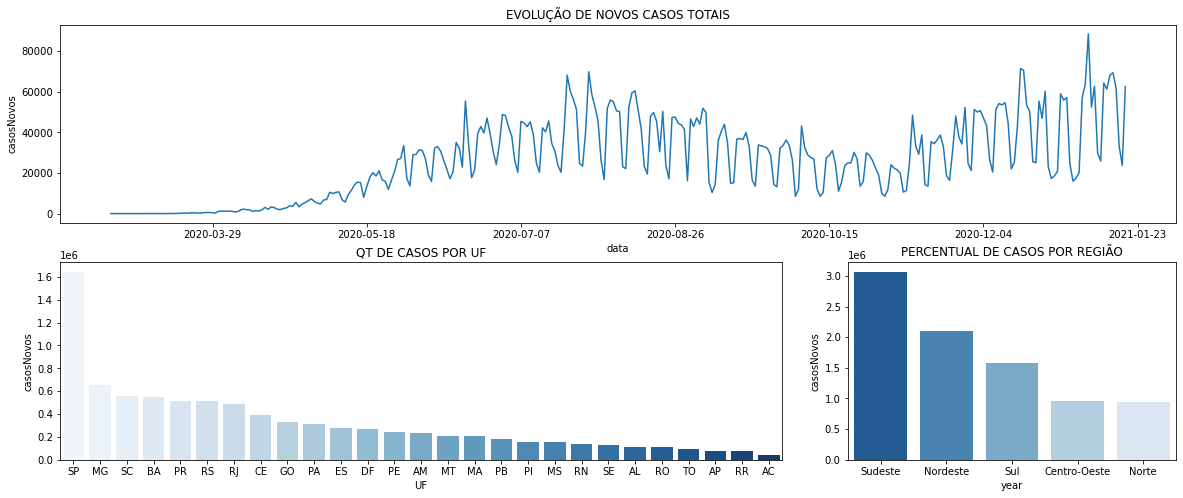

In [14]:
fig3 = plt.figure(constrained_layout=True)
fig3 = plt.figure(figsize=(20,8))

#######


gs = fig3.add_gridspec(2, 3) ## number of charts


graph1 = fig3.add_subplot(gs[0, :]) ##chart 1
graph1.set_title('EVOLUÇÃO DE NOVOS CASOS TOTAIS')
graph1 = sns.lineplot(data=novos_casos, x='data', y='casosNovos', 
                      palette='Blues')
graph1.xaxis.set_major_locator(ticker.AutoLocator())


#######

c = covid[['estado', 'casosNovos']].groupby('estado').sum().reset_index().sort_values(by='casosNovos',
                                                                                     ascending=False)

graph2 = fig3.add_subplot(gs[1, :-1])
graph2.set_title('QT DE CASOS POR UF')
graph2 = sns.barplot(data = c, x = 'estado', y='casosNovos', 
                     palette = 'Blues')
graph2 = plt.xlabel('UF')


#######
b = data = covid[['regiao', 'casosNovos']].groupby('regiao').sum().reset_index().sort_values(by='casosNovos', ascending=False)

graph3 = fig3.add_subplot(gs[1:, -1])
graph3.set_title('PERCENTUAL DE CASOS POR REGIÃO')
graph3 = sns.barplot(data = b, x='regiao', y='casosNovos',palette='Blues_r')
graph3 = plt.xlabel('year')


#######

fig3 = fig3



***

<b> <p>&#128204; CONCLUSÕES:</p></b>  

**1.** Maior quantidade de novos casos entre junho - ago/20

**2.** SP, até por ser o local mais populoso, lidera a quantidade de contaminações

**3.** Norte é a região com menor quantidade de contaminados

***

<Figure size 432x288 with 0 Axes>

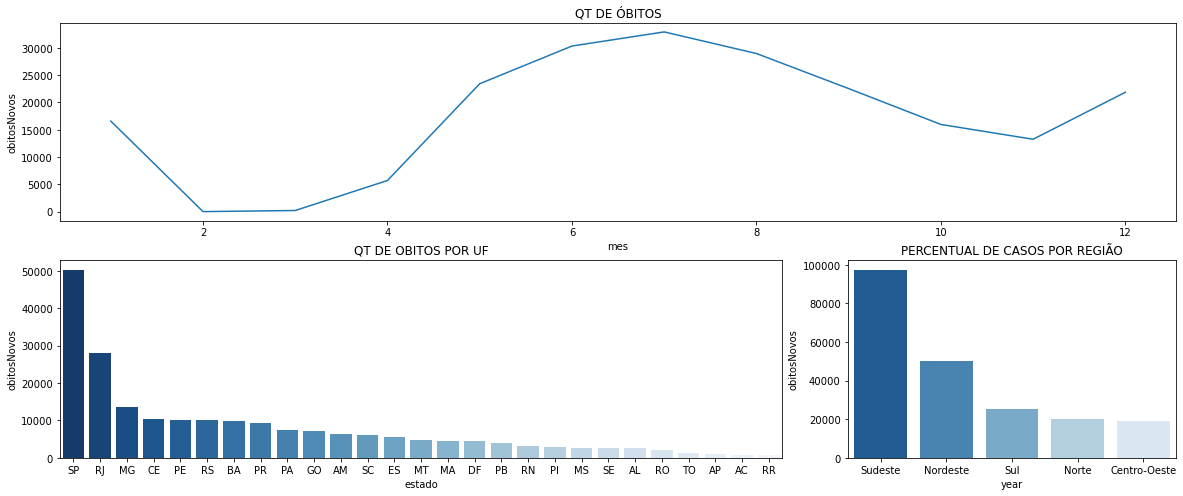

In [15]:
fig3 = plt.figure(constrained_layout=True)
fig3 = plt.figure(figsize=(20,8))

#######


gs = fig3.add_gridspec(2, 3) ## number of charts

sns.dark_palette("#69d", reverse=True, as_cmap=True)
obitos = covid[['mes', 'obitosNovos']].groupby('mes').sum()
graph1 = fig3.add_subplot(gs[0, :]) ##chart 1
graph1.set_title('QT DE ÓBITOS')
graph1 = sns.lineplot(data=obitos, x='mes', y='obitosNovos',  ci=False)
graph1.xaxis.set_major_locator(ticker.AutoLocator())


#######

obitos_uf = covid[['estado', 'obitosNovos']].groupby('estado').sum().reset_index()
order = obitos_uf.sort_values(by='obitosNovos', ascending=False)['estado']

graph2 = fig3.add_subplot(gs[1, :-1])

graph2.set_title('QT DE OBITOS POR UF')
graph2 = sns.barplot(data = obitos_uf, x ='estado',y='obitosNovos', order = order, palette='Blues_r')



#######

a = covid[['regiao', 'obitosNovos']].groupby('regiao').sum().reset_index().sort_values(by='obitosNovos', 
                                                                                       ascending=False)

graph3 = fig3.add_subplot(gs[1:, -1])
graph3.set_title('PERCENTUAL DE CASOS POR REGIÃO')
graph3 = sns.barplot(data = a, x= 'regiao', y='obitosNovos',
                     palette='Blues_r')
graph3 = plt.xlabel('year')


#######

fig3 = fig3



***

<b> <p>&#128204; CONCLUSÕES:</p></b>  


**1.** O mesmo pico observado de contaminações também ocorreu no caso de óbitos

**2.** Ponto de atenção: Norte é a menor região com novos casos, porém, não é a menor em número de óbitos.

**3.** Proporcionalmente, Amazonas possui maior quantidade de mortes em relação a contaminados

***

### COVID x POPULAÇÃO

In [16]:
# ajustando o nome dos estados
populacao.reset_index(inplace = True)
populacao['Região/Unidade da Federação'].replace('.. ', '', inplace = True, regex=True)

# Dicionario com estados e UF
siglas = {
'Acre':'AC',
'Alagoas':'AL',
'Amapá':'AP',
'Amazonas':'AM',
'Bahia':'BA',
'Ceará':'CE',
'DistriFederal':'DF',
'EspíriSanto':'ES',
'Goiás':'GO',
'Maranhão':'MA',
'MaGrosso':'MT',
'MaGrosSul':'MS',
'MinGerais':'MG',
'Pará':'PA',
'Paraíba':'PB',
'Paraná':'PR',
'Pernambuco':'PE',
'Piauí':'PI',
'RJaneiro':'RJ',
'RGranNorte':'RN',
'RGranSul':'RS',
'Rondônia':'RO',
'Roraima':'RR',
'SanCatarina':'SC',
'SPaulo':'SP',
'Sergipe':'SE',
'Tocantins':'TO'
}

# Inserindo a coluna com uf
populacao['uf'] = populacao['Região/Unidade da Federação'].map(siglas)

In [17]:
populacao_e_contagio = populacao[['uf', '2019']]

#qt de casos por UF
covid_por_uf = covid[['estado', 'casosNovos']].groupby('estado').sum().reset_index()
covid_por_uf.rename(columns={'estado' : 'uf'}, inplace=True) # renomeando as colunas

# qt de obitos por UF
obitos_por_uf = covid[['estado', 'obitosNovos']].groupby('estado').sum().reset_index()
obitos_por_uf.rename(columns={'estado' : 'uf'}, inplace=True)

populacao_e_contagio = populacao_e_contagio.merge(covid_por_uf, on='uf', how = 'inner') #inserindo casos
populacao_e_contagio = populacao_e_contagio.merge(obitos_por_uf, on='uf', how = 'inner') #inserindo obitos
populacao_e_contagio.rename(columns={'2019' : 'Populacao_2019'}, inplace=True) #renomeando a coluna 2019

In [18]:
# Calculando a qt de contagio para cada 1k de habitantes
populacao_e_contagio['contagio_1k_habitante'] = (populacao_e_contagio['casosNovos'] /  populacao_e_contagio['Populacao_2019']) * 1000

# Calculando a qt de obitos para cada 1k de habitantes
populacao_e_contagio['mortalidade_1k'] = (populacao_e_contagio['obitosNovos'] /  populacao_e_contagio['Populacao_2019']) * 1000

# Calculando a qt de obitos pela qt. de contagios
populacao_e_contagio['letalidade_1k'] = (populacao_e_contagio['obitosNovos'] / populacao_e_contagio['casosNovos'] ) * 1000

populacao_e_contagio

,uf,Populacao_2019,casosNovos,obitosNovos,contagio_1k_habitante,mortalidade_1k,letalidade_1k
0,RO,1841142.0,111399.0,2044,60.505382,1.110181,18.348459
1,AC,854691.0,45208.0,839,52.893970,0.981641,18.558662
2,AM,4182899.0,233971.0,6450,55.935130,1.541993,27.567519
3,RR,538963.0,73184.0,823,135.786687,1.527006,11.245627
4,PA,8544639.0,311063.0,7427,36.404464,0.869200,23.876192
5,AP,828028.0,74045.0,1010,89.423305,1.219766,13.640354
6,TO,1583391.0,97198.0,1323,61.385975,0.835549,13.611391
7,MA,7083578.0,203998.0,4618,28.798723,0.651930,22.637477
8,PI,3229651.0,152215.0,2968,47.130479,0.918985,19.498735
9,CE,9128090.0,394913.0,10240,43.263487,1.121812,25.929762


<Figure size 432x288 with 0 Axes>

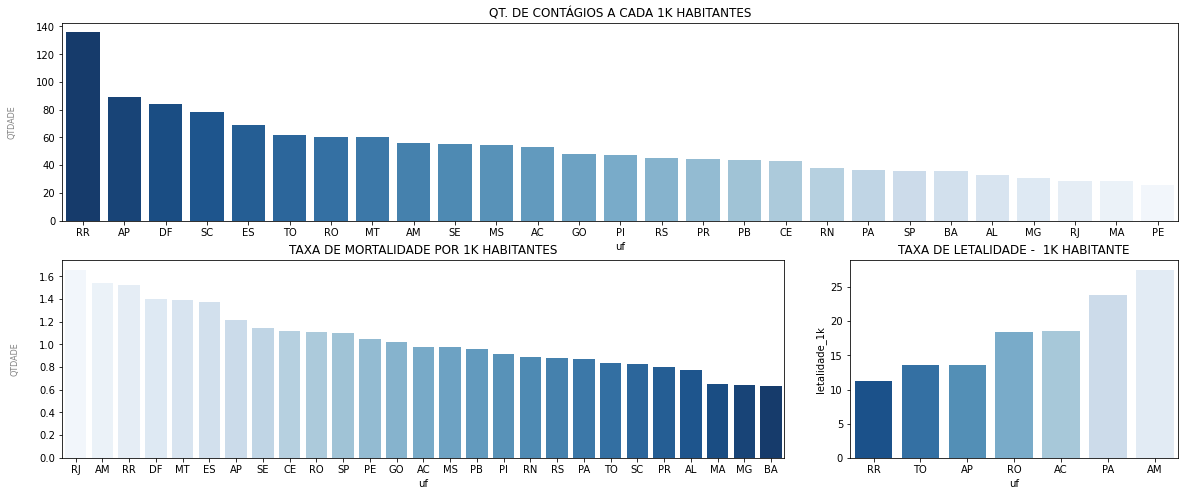

In [19]:
fig3 = plt.figure(constrained_layout=True)
fig3 = plt.figure(figsize=(20,8))

#######


gs = fig3.add_gridspec(2, 3) ## number of charts


graph1 = fig3.add_subplot(gs[0, :]) ##chart 1

graph1.set_title('QT. DE CONTÁGIOS A CADA 1K HABITANTES')
sns.barplot(data = populacao_e_contagio.sort_values('contagio_1k_habitante', ascending=False), x= 'uf', y='contagio_1k_habitante',
                     palette='Blues_r')
plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)



#######


order = obitos_uf.sort_values(by='obitosNovos', ascending=False)['estado']
graph2 = fig3.add_subplot(gs[1, :-1])
graph2.set_title('TAXA DE MORTALIDADE POR 1K HABITANTES')

graph2= sns.barplot(data = populacao_e_contagio.sort_values('mortalidade_1k', ascending=False), x= 'uf', y='mortalidade_1k', 
                                         palette='Blues')

plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)


#######

norte = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']


graph3 = fig3.add_subplot(gs[1:, -1])
graph3.set_title('TAXA DE LETALIDADE -  1K HABITANTE')
graph3 = sns.barplot(data = populacao_e_contagio[populacao_e_contagio['uf'].isin(norte)].sort_values(by='letalidade_1k'), x= 'uf', y='letalidade_1k',
                     palette='Blues_r')


#######

fig3 = fig3;



<b> <p>&#128204; CONCLUSÕES:</p></b>  

**1.** AM está em segundo colocado em taxa de mortalidade

**2.** Na região Norte, é o estado com maior taxa de letalidade


In [20]:
populacao_e_contagio[['uf','letalidade_1k']].sort_values(by='letalidade_1k',
                                                                             ascending=False).style.apply(highlight_max)

,uf,letalidade_1k
18,RJ,57.559483
12,PE,41.319395
19,SP,30.569142
2,AM,27.567519
9,CE,25.929762
4,PA,23.876192
10,RN,23.624265
13,AL,23.557273
24,MT,23.236571
7,MA,22.637477


In [21]:
populacao_e_contagio[['uf','mortalidade_1k']].sort_values(by='mortalidade_1k',
                                                                             ascending=False).style.apply(highlight_max)

,uf,mortalidade_1k
18,RJ,1.660868
2,AM,1.541993
3,RR,1.527006
26,DF,1.402709
24,MT,1.396172
17,ES,1.374531
5,AP,1.219766
14,SE,1.146988
9,CE,1.121812
0,RO,1.110181


### LEITOS x POPULAÇÃO

In [22]:
# ajustando o nome dos estados
leitos.reset_index(inplace = True)
leitos['Região/Unidade da Federação'].replace('.. ', '', inplace = True, regex=True)

# Inserindo a coluna com uf
leitos['uf'] = leitos['Região/Unidade da Federação'].map(siglas)

# transformando 'uf' em index
leitos.set_index('uf', inplace=True)

# Excluindo a coluna leitos
leitos.drop(columns=('Região/Unidade da Federação'), inplace=True)

# Slice do ano
# Criando a coluna ano
leitos = leitos.T.reset_index()
leitos['ano'] = leitos['index'].str.slice(start = 0, stop = 4)

# Criando a coluna do mes
leitos['mes'] = leitos['index'].str.slice(start = 5, stop = 8)

In [23]:
# Transformando os meses para ingles
meses_port_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

# traduzinho os meses
leitos['mes'] = leitos['mes'].map(meses_port_ing)

In [24]:
# Concatenando o ano e mes
leitos['data'] = leitos['ano'] + "-" + leitos['mes']

# Alterando o tipo de dado
leitos['data'] = pd.to_datetime(leitos['data'])

# removendo as colunas
leitos.drop(columns=(['index', 'ano', 'mes']), inplace = True)  

# Fazendo melt
leitos = leitos.melt(id_vars='data', value_name='qt_leitos')

# Criando a coluna de mes e ano
leitos['mes'] = leitos['data'].dt.month
leitos['ano'] = leitos['data'].dt.year

leitos

,data,uf,qt_leitos,mes,ano
0,2009-01-01,RO,3588,1,2009
1,2009-02-01,RO,3660,2,2009
2,2009-03-01,RO,3665,3,2009
3,2009-04-01,RO,3666,4,2009
4,2009-05-01,RO,3680,5,2009
...,...,...,...,...,...
3883,2020-08-01,DF,7317,8,2020
3884,2020-09-01,DF,7364,9,2020
3885,2020-10-01,DF,7528,10,2020
3886,2020-11-01,DF,7609,11,2020


In [25]:
# Criando uma coluna considerando a qt. de leitos no mes 12
leitos_ano = leitos[leitos['mes'] == 12]
leitos_ano.drop(columns=(['data', 'mes']), inplace = True)

In [26]:
# Criando um 'contador' que servirá como chave
leitos_ano = leitos_ano.sort_values(by=['uf', 'ano'])
leitos_ano['contador'] = [num for num in np.arange(0,len(leitos_ano))]


In [27]:
# selecionando as colunas alvo
leitos_por_populacao = populacao[['uf', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

# Fazendo melt
leitos_por_populacao = leitos_por_populacao.melt(id_vars='uf', var_name='ano', value_name='populacao')

# Criando contador para servir de chave
leitos_por_populacao = leitos_por_populacao.sort_values(by=['uf', 'ano'])
leitos_por_populacao['contador'] = [num for num in np.arange(0,len(leitos_por_populacao))]


In [28]:
# Fazendo merge
leitos_por_populacao = leitos_por_populacao.merge(leitos_ano[['qt_leitos', 'contador']], how='inner', on='contador')
leitos_por_populacao.drop(columns=('contador'), inplace=True)

# Calculo da quantidade de leitos por populacao
leitos_por_populacao['leitos_por_populacao'] = round((leitos_por_populacao['qt_leitos'] / leitos_por_populacao['populacao']) * 1000,4)

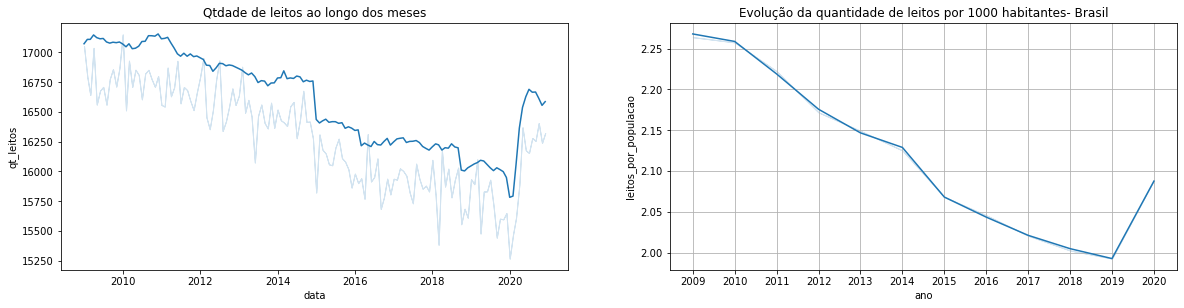

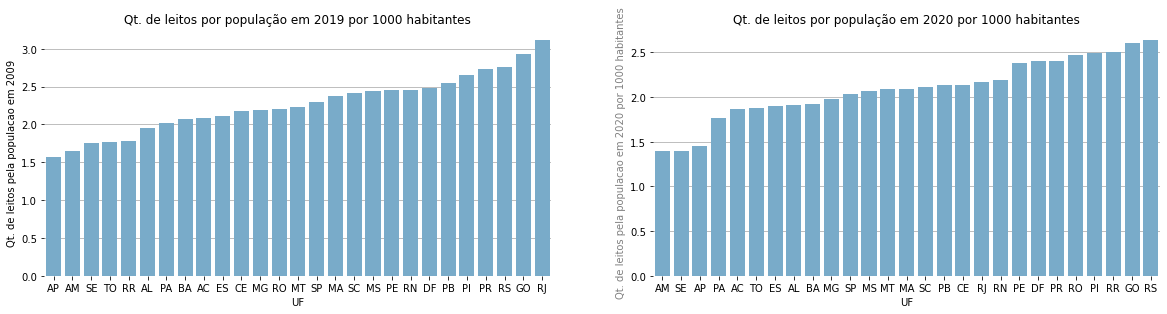

In [29]:
plt.figure(figsize=(20, 10))

ax3 = plt.subplot(2, 2, 1)
ax3 = sns.lineplot(data = leitos, x='data', y='qt_leitos', ci=False)
plt.title('Qtdade de leitos ao longo dos meses')

ax1 = plt.subplot(2, 2, 2)
sns.lineplot(data = leitos_por_populacao, y='leitos_por_populacao', x='ano', ci=False)
plt.title('Evolução da quantidade de leitos por 1000 habitantes- Brasil')
plt.grid(True)



plt.figure(figsize=(20, 10))
ax1 = plt.subplot(2, 2, 1)

ax1 = sns.barplot(data = leitos_por_populacao[leitos_por_populacao['ano'] == '2009'].sort_values(by='leitos_por_populacao'), 
                  x='uf', y ='leitos_por_populacao', hue='ano', palette='Blues_r')
plt.xlabel('UF')
plt.ylabel('Qt. de leitos pela populacao em 2009')
plt.title('Qt. de leitos por população em 2019 por 1000 habitantes')
ax1.grid(axis='y')
ax1.set_axisbelow(True)
sns.despine(bottom = True, left=True)
ax1.legend().set_visible(False)


ax2 = plt.subplot(2, 2, 2)


ax = sns.barplot(data = leitos_por_populacao[leitos_por_populacao['ano'] == '2020'].sort_values(by='leitos_por_populacao'), 
                 x='uf', y ='leitos_por_populacao', hue='ano', palette='Blues_r')
plt.xlabel('UF')
plt.ylabel('Qt. de leitos pela populacao em 2020 por 1000 habitantes', color = 'grey')
plt.title('Qt. de leitos por população em 2020 por 1000 habitantes')
ax2.grid(axis='y')
ax2.set_axisbelow(True)
sns.despine(bottom = True, left=True)
ax2.legend().set_visible(False)

ax;

<b> <p>&#128204; CONCLUSÕES:</p></b>  

**1.** No Brasil, nota-se que a quantidade de leitos reduziu ao longo dos anos (com exceção de 2020 - possivelmente devido ao Coronavirus)

**2.** Em 2009, AM já ocupava a segunda menor taxa de leitos por população

**3.** Após uma década, AM ocupou a primeira menor taxa de leitos por população.

**4.** No geral, o Brasil reduziu a quantidade de leitos por 1k de habitantes


### INTERNAÇÕES 

In [30]:
# ajustando o nome dos estados
internacoes.reset_index(inplace = True)
internacoes['Região/Unidade da Federação'].replace('.. ', '', inplace = True, regex=True)

# Inserindo a coluna com uf
internacoes['uf'] = internacoes['Região/Unidade da Federação'].map(siglas)

# transformando 'uf' em index
internacoes.set_index('uf', inplace=True)

# Excluindo a coluna leitos
internacoes.drop(columns=(['Região/Unidade da Federação', 'Total']), inplace=True)

# Slice do ano
# Criando a coluna ano
internacoes = internacoes.T.reset_index()
internacoes['ano'] = internacoes['index'].str.slice(start = 0, stop = 4)

# Criando a coluna do mes
internacoes['mes'] = internacoes['index'].str.slice(start = 5, stop = 8)

# traduzinho os meses
internacoes['mes'] = internacoes['mes'].map(meses_port_ing)

# Concatenando o ano e mes
internacoes['data'] = internacoes['ano'] + "-" + internacoes['mes']

# Alterando o tipo de dado
internacoes['data'] = pd.to_datetime(internacoes['data'])

# removendo as colunas
internacoes.drop(columns=(['index', 'ano', 'mes']), inplace = True)

# Fazendo melt
internacoes = internacoes.melt(id_vars='data', value_name='qt_internacoes')

# Criando a coluna de mes e ano
internacoes['mes'] = internacoes['data'].dt.month
internacoes['ano'] = internacoes['data'].dt.year


internacoes



,data,uf,qt_internacoes,mes,ano
0,2009-01-01,RO,5891,1,2009
1,2009-02-01,RO,6608,2,2009
2,2009-03-01,RO,6950,3,2009
3,2009-04-01,RO,6857,4,2009
4,2009-05-01,RO,7343,5,2009
...,...,...,...,...,...
3856,2020-07-01,DF,14999,7,2020
3857,2020-08-01,DF,15121,8,2020
3858,2020-09-01,DF,14127,9,2020
3859,2020-10-01,DF,15043,10,2020


In [31]:
# Criando uma coluna considerando a qt. de leitos no mes 12
internacoes_ano = internacoes[internacoes['mes'] == 11]
internacoes_ano.drop(columns=(['data', 'mes']), inplace = True)

# Criando um 'contador' que servirá como chave
internacoes_ano = internacoes_ano.sort_values(by=['uf', 'ano'])
internacoes_ano['contador'] = [num for num in np.arange(0,len(internacoes_ano))]

# selecionando as colunas alvo
internacoes_por_populacao = populacao[['uf', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

# Fazendo melt
internacoes_por_populacao = internacoes_por_populacao.melt(id_vars='uf', var_name='ano', value_name='populacao')

# Criando contador para servir de chave
internacoes_por_populacao = internacoes_por_populacao.sort_values(by=['uf', 'ano'])
internacoes_por_populacao['contador'] = [num for num in np.arange(0,len(internacoes_por_populacao))]

# Fazendo merge
internacoes_por_populacao = internacoes_por_populacao.merge(internacoes_ano[['qt_internacoes', 'contador']], how='inner', on='contador')
internacoes_por_populacao.drop(columns=('contador'), inplace=True)

# Calculo da quantidade de leitos por populacao
internacoes_por_populacao['internacoes_por_populacao'] = (internacoes_por_populacao['qt_internacoes'] / internacoes_por_populacao['populacao']) * 1000

# Corrigindo valor faltante
internacoes['qt_internacoes'].replace('-', 2194, inplace = True)

# Alterando tipo de dado
internacoes['qt_internacoes'] = internacoes['qt_internacoes'].astype(int)
internacoes_por_populacao['qt_internacoes'] = internacoes_por_populacao['qt_internacoes'].astype(int)
internacoes_por_populacao['internacoes_por_populacao'] = internacoes_por_populacao['internacoes_por_populacao'].astype(float)

internacoes_por_populacao

,uf,ano,populacao,qt_internacoes,internacoes_por_populacao
0,AC,2009,720132.0,1888,2.621742
1,AC,2010,734447.0,2097,2.855209
2,AC,2011,748616.0,2538,3.390256
3,AC,2012,762631.0,2916,3.823605
4,AC,2013,776463.0,2421,3.117985
...,...,...,...,...,...
319,TO,2016,1532902.0,5960,3.888050
320,TO,2017,1550194.0,5269,3.398929
321,TO,2018,1567016.0,4661,2.974443
322,TO,2019,1583391.0,5670,3.580922


Text(0.5, 1.0, 'Quantidade de internacoes no Brasil até 2019')

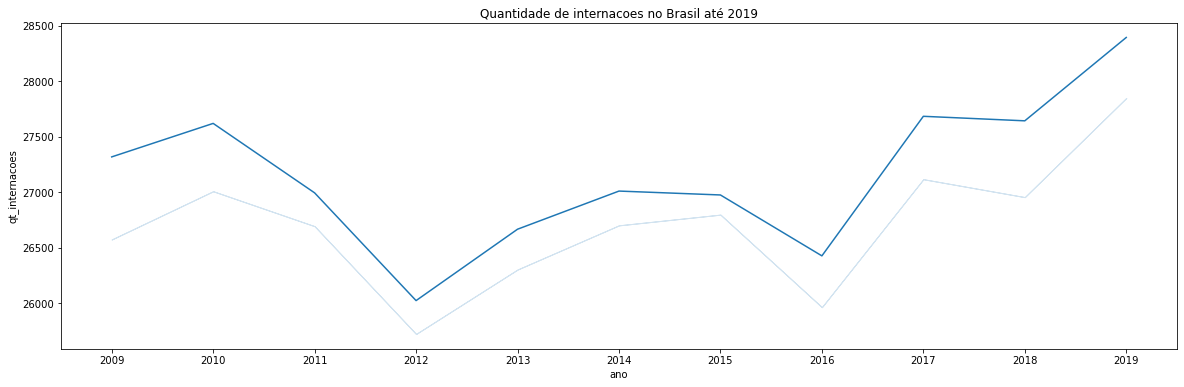

In [32]:
plt.figure(figsize=(20, 6))

ax = sns.lineplot(data = internacoes_por_populacao[internacoes_por_populacao['ano'] != '2020'], x='ano', y='qt_internacoes', ci=False)
plt.title('Quantidade de internacoes no Brasil até 2019')


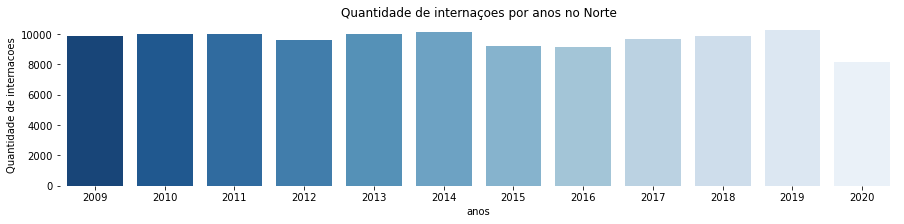

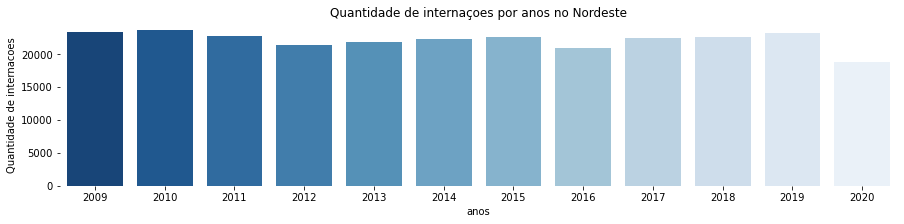

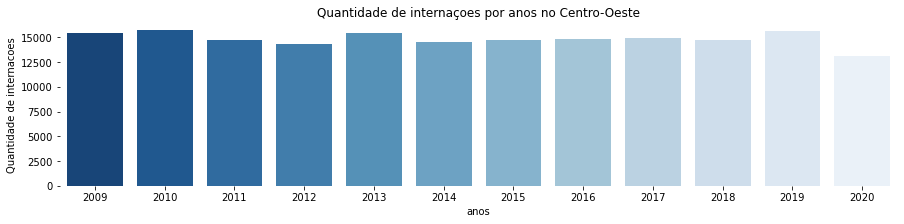

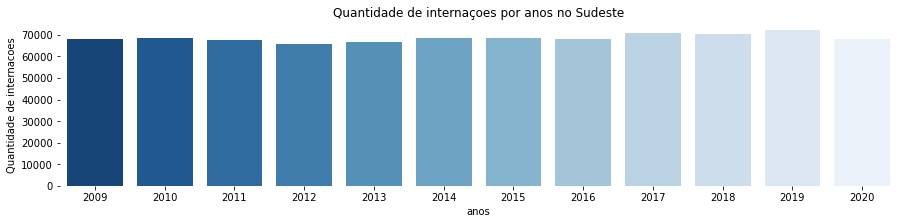

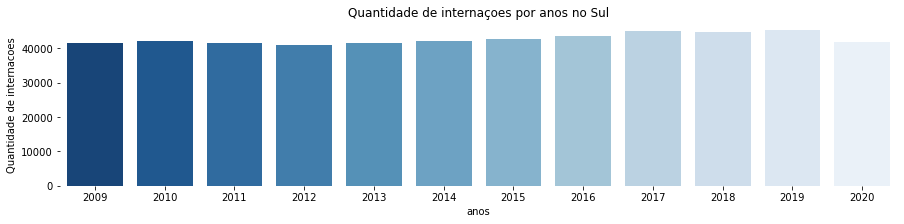

In [33]:
# Classificando as regioes
regioes = covid[['regiao', 'estado']].drop_duplicates()
regioes.rename(columns={'estado' : 'uf'}, inplace=True)
internacoes_por_populacao = internacoes_por_populacao.merge(regioes, on='uf', how='inner')


for u in internacoes_por_populacao.regiao.drop_duplicates(): 
    plt.figure(figsize=(15, 3))
    sns.barplot(data = internacoes_por_populacao[internacoes_por_populacao['regiao'] == u], y='qt_internacoes',
               x='ano', palette='Blues_r', ci=None)
    plt.xlabel('anos')
    plt.ylabel('Quantidade de internacoes')
    plt.title('Quantidade de internaçoes por anos no {}'.format(u))
    sns.despine(bottom=True, left = True)

<b> <p>&#128204; CONCLUSÕES:</p></b>  

**1.** As internações no Brasil reduziram de 2010 a 2012, com picos até 2016.

**2.** A partir de 2016 houve aumento de casos

## SÉRIE TEMPORAL - COVID

<b> <p>&#128206; NESTA SEÇÃO:</p></b>  

Para suavizar a linha e identificar as tendências de forma mais clara, nesta seção foram analisados os casos de COVID no Brasil e no Amazonas com diferentes médias móveis.

### MÉDIA MÓVEL

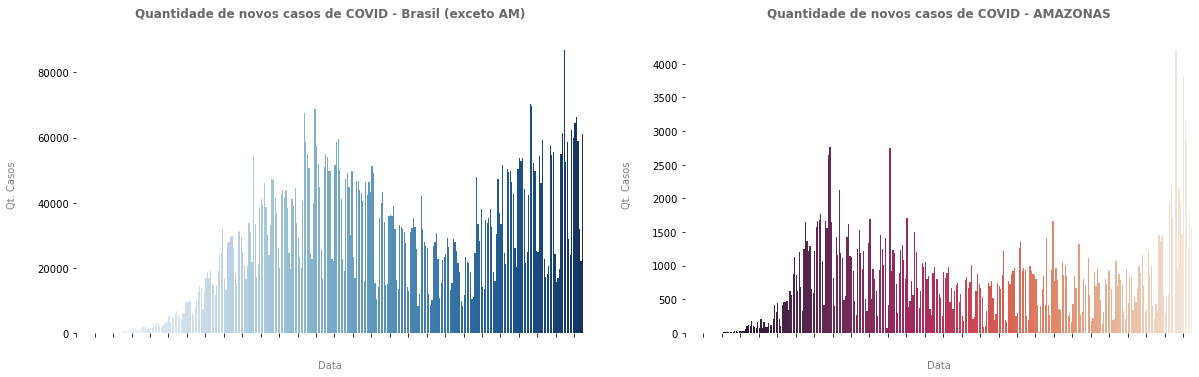

In [34]:
covid_br = covid[covid['estado'] != 'AM']
covid_am = covid[covid['estado'] == 'AM']

plt.figure(figsize=(20, 12))
ax = plt.subplot(2, 2, 1)

ax = sns.barplot(data = covid_br, x='data', y='casosNovos', palette='Blues', ci = False, estimator=sum)
plt.title('Quantidade de novos casos de COVID - Brasil (exceto AM)', color = 'dimgrey', fontweight = 'bold', size = 12, pad = 20)
plt.xlabel('Data', color='grey', labelpad=20)
plt.ylabel('Qt. Casos', color='grey', labelpad=20)
sns.despine(bottom = True, left=True)

ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))

ax2 = plt.subplot(2,2,2)

ax2 = sns.barplot(data = covid_am, x='data', y='casosNovos', palette='rocket', ci = False, estimator=sum)
plt.title('Quantidade de novos casos de COVID - AMAZONAS', color = 'dimgrey', fontweight='bold', size = 12, pad = 20)
plt.xlabel('Data', color='grey', labelpad=20)
plt.ylabel('Qt. Casos', color='grey', labelpad=20)
sns.despine(bottom = True, left=True)

ax2.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))


<b> <p>&#128204; CONCLUSÕES:</p></b>  

**1.** No Brasil, nota-se que os maiores picos foram mais "suavizados". O período com menor número de infectados durou poucos meses.

**2.** Em Manaus, o início da pandemia registrou maiores contaminações, porém, por menor tempo. A quantidade de novos casos se manteve mais constante do que o observado no Brasil, registrando pico repentino no final de 2020.

#### MÉDIA MÓVEL - BRASIL

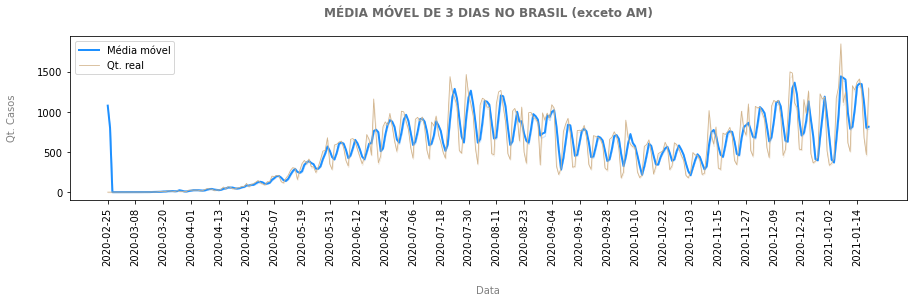

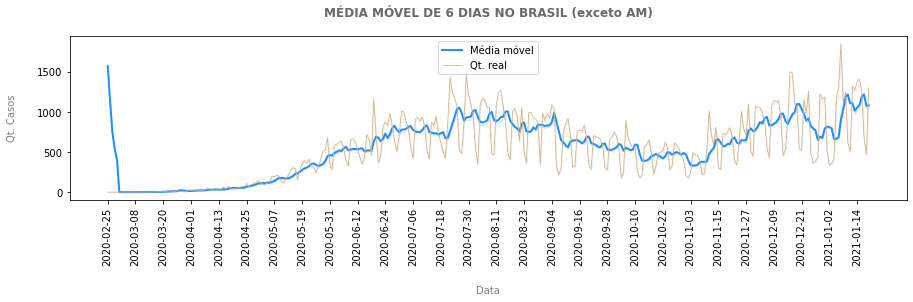

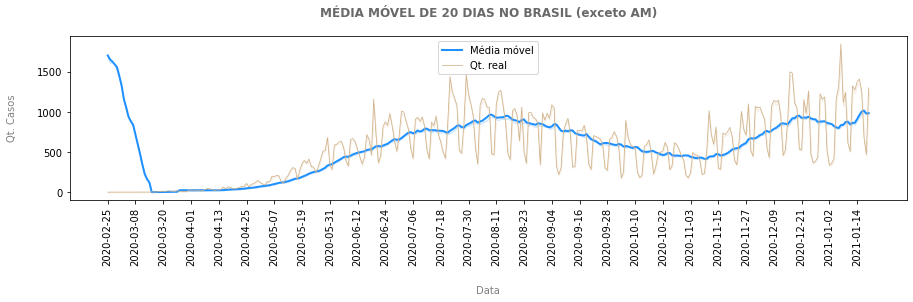

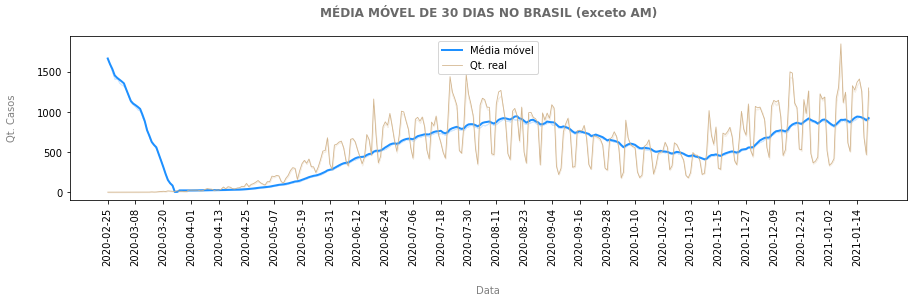

In [35]:
periodos= [3, 6, 20, 30]


for m in periodos:
    plt.figure(figsize=(15, 3))
    covid_br_MM = covid_br[['data', 'casosNovos']]
    covid_br_MM['MM_{}'.format(m)] = covid_br_MM['casosNovos'].rolling(m).mean()
    
    ax = sns.lineplot(data = covid_br_MM, x='data', y='MM_{}'.format(m), color = 'dodgerblue', linewidth=2,
                     label='Média móvel', ci=False)
    sns.lineplot(data=covid_br, x='data', y='casosNovos', color = 'tan', linewidth=0.8, label='Qt. real',
                ci=False)
    plt.title('MÉDIA MÓVEL DE {} DIAS NO BRASIL (exceto AM)'.format(m), color = 'dimgrey', fontweight='bold', 
              size = 12, pad = 20)
    plt.xlabel('Data', color='grey', labelpad=20)
    plt.ylabel('Qt. Casos', color='grey', labelpad=20)
    plt.grid(False)
    plt.xticks(rotation=90)
    ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
    

#### MÉDIA MOVEL - AMAZONAS

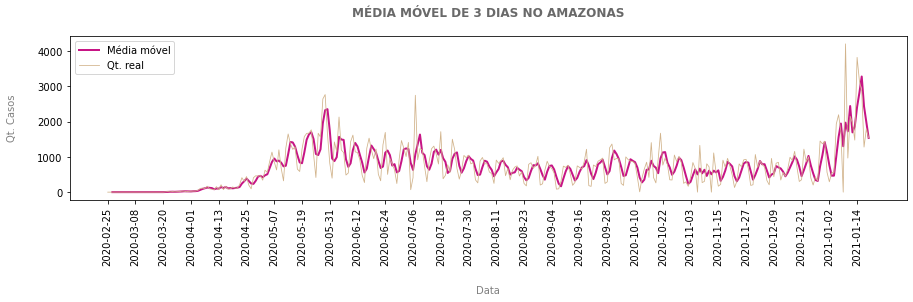

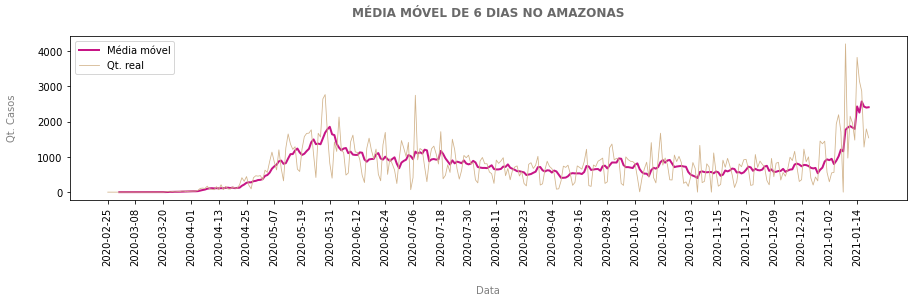

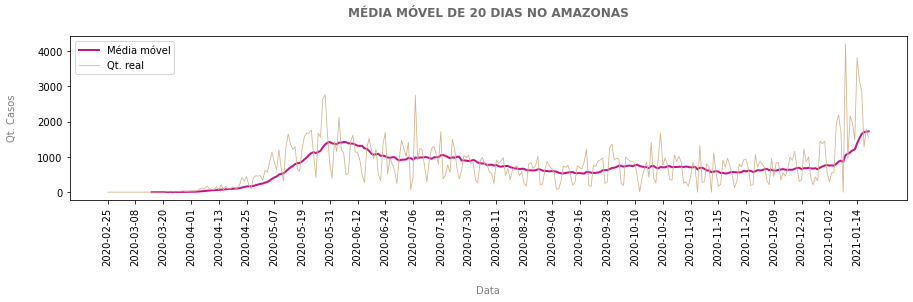

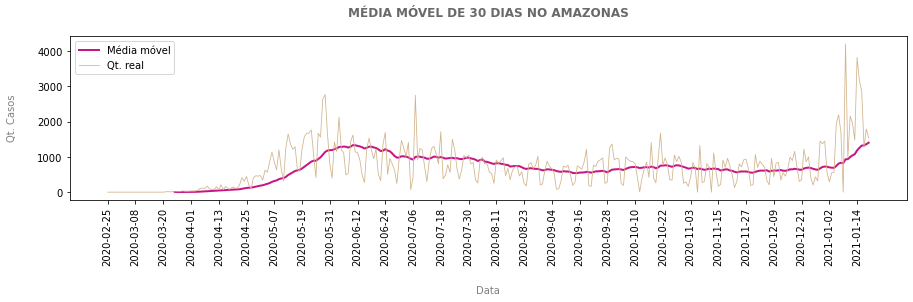

In [36]:
for m in periodos:
    plt.figure(figsize=(15, 3))
    covid_am_MM = covid_am[['data', 'casosNovos']]
    covid_am_MM['MM_{}'.format(m)] = covid_am_MM['casosNovos'].rolling(m).mean()
    
    ax = sns.lineplot(data = covid_am_MM, x='data', y='MM_{}'.format(m), color = 'mediumvioletred', linewidth=2,
                     label='Média móvel', ci=False)
    sns.lineplot(data=covid_am, x='data', y='casosNovos', color = 'tan', linewidth=0.8, label='Qt. real', 
                 ci=False)
    plt.title('MÉDIA MÓVEL DE {} DIAS NO AMAZONAS'.format(m), color = 'dimgrey', fontweight='bold', size = 12, pad = 20)
    plt.xlabel('Data', color='grey', labelpad=20)
    plt.ylabel('Qt. Casos', color='grey', labelpad=20)
    plt.grid(False)
    plt.xticks(rotation=90)
    ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
    

***

<b> <p>&#128204; CONCLUSÕES:</p></b>  

**1.** Quando suavizamos a linha temporal com média móvel de 20 dias, no Brasil, é possível notar "ondas", sendo o período de menor contaminação  relativamente menor do que os picos de maiores contaminações.

**2.** Em Manaus, após o pico em maio/junho, as contaminações se mantêm com um comportamento mais constante. O aumento nos casos no final de 2020 é notável, mesmo nas medias móveis de 30 dias.

***

### DECOMPOSIÇÃO DA SÉRIE TEMPORAL

***

<b> <p>&#128206; NESTA SEÇÃO:</p></b>  

A decomposição da série temporal é bastante útil para visualizar seus componentes, subsidiando-se assim, a escolha do melhor modelo de previsão e/ou a necessidade do tratamento dos dados (como suavização) para realizar as previsões.

Vamos decompor as séries temporais tanto no modelo aditivo como multiplicativo, sendo possível assim, identificar se há sazonalidade, tendência e os resíduos.

***

#### DECOMPOSIÇÃO CASOS EM SP


 - - - - - - - Decomposição da Serie Temporal de casos de COVID-19 no Brasil (exceto AM) (freq: 30) - - - - - - - -


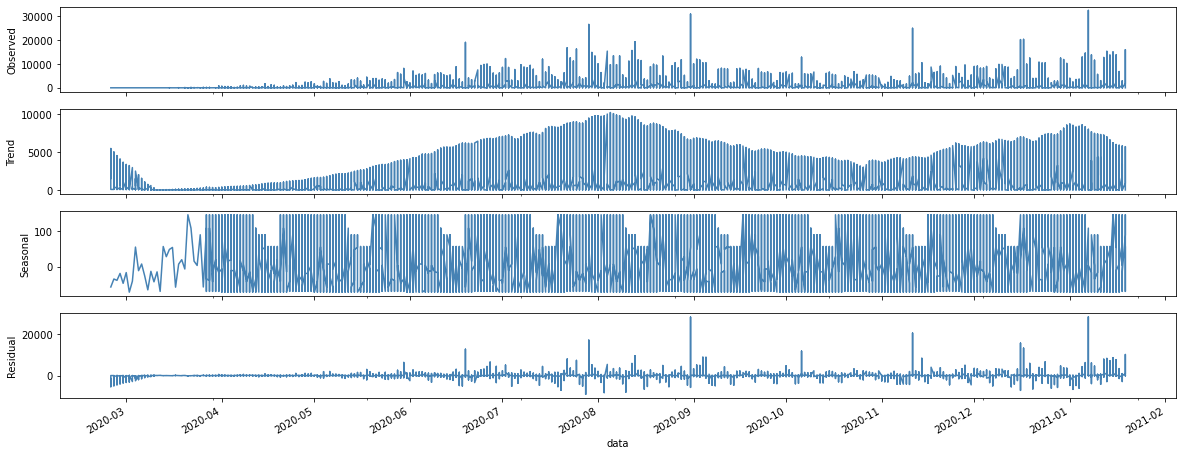

In [37]:
decomposicaobr = seasonal_decompose(covid_br[['data', 'casosNovos']].set_index('data'), model = 'aditive', freq=30)

fig, axes = plt.subplots(4, 1, sharex=True)

print('')
print(' - - - - - - - Decomposição da Serie Temporal de casos de COVID-19 no Brasil (exceto AM) (freq: 30) - - - - - - - -')
decomposicaobr.observed.plot(ax=axes[0], legend=False, color='steelblue', figsize=(20,8)) 
axes[0].set_ylabel('Observed')

decomposicaobr.trend.plot(ax=axes[1], legend=False, color='steelblue')
axes[1].set_ylabel('Trend')

decomposicaobr.seasonal.plot(ax=axes[2],  legend=False,  color='steelblue')
axes[2].set_ylabel('Seasonal')

decomposicaobr.resid.plot(ax=axes[3], legend=False, color='steelblue')
axes[3].set_ylabel('Residual');


      Decomposição da Serie Temporal de casos de COVID-19 no Brasil (exceto AM) (freq: 30)     
          ---- Modelo Multiplicativo com comparação dos resíduos no modelo aditivo ---- 


''

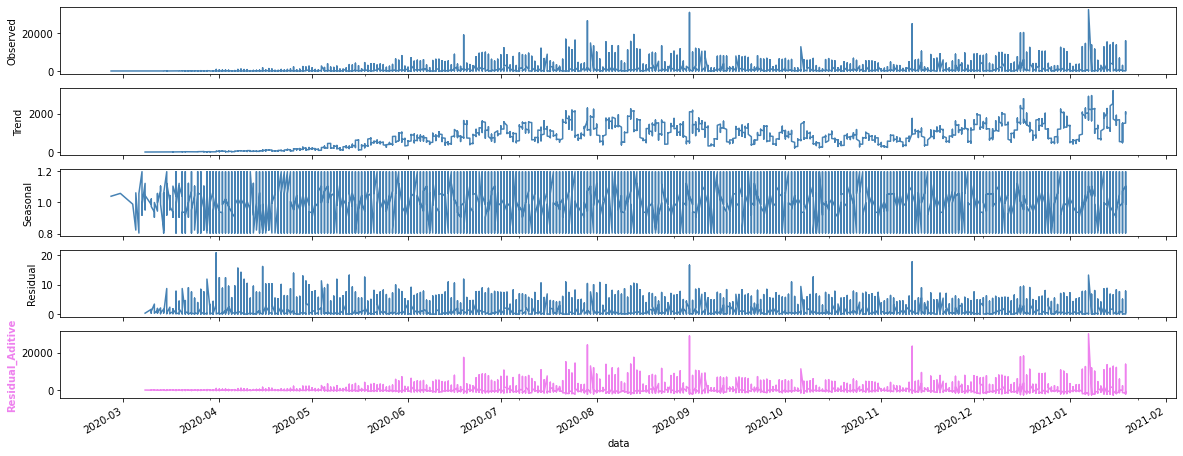

In [38]:
decomposicaobr = seasonal_decompose(covid_br[covid_br['casosNovos'] > 0][['data', 'casosNovos']].set_index('data').sort_index(), 
                                    model = 'multiplicative', freq=30)

decomposicaom = seasonal_decompose(covid_br[covid_br['casosNovos'] > 0][['data', 'casosNovos']].set_index('data').sort_index(), 
                                    model = 'aditive', freq=30)


fig, axes = plt.subplots(5, 1, sharex=True)

print('')
print('      Decomposição da Serie Temporal de casos de COVID-19 no Brasil (exceto AM) (freq: 30)     ')
print('          ---- Modelo Multiplicativo com comparação dos resíduos no modelo aditivo ---- ')

decomposicaobr.observed.plot(ax=axes[0], legend=False, color='steelblue', figsize=(20,8)) 
axes[0].set_ylabel('Observed')
decomposicaobr.trend.plot(ax=axes[1], legend=False, color='steelblue')
axes[1].set_ylabel('Trend')
decomposicaobr.seasonal.plot(ax=axes[2], legend=False, color='steelblue', figsize=(20,8))
axes[2].set_ylabel('Seasonal')
decomposicaobr.resid.plot(ax=axes[3], legend=False, color='steelblue')
axes[3].set_ylabel('Residual');

decomposicaom.resid.plot(ax=axes[4], legend=False, color='violet')
axes[4].set_ylabel('Residual_Aditive', color = 'violet', fontweight ='bold')
;

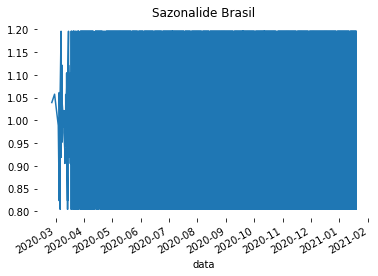

In [39]:
plt.title('Sazonalide Brasil')
decomposicaobr.seasonal.plot();
sns.despine(bottom = True, left=True)

***

<b> <p>&#128204; CONCLUSÕES:</p></b>  

**1.** Na decomposição dos casos no Brasil, é possível observar:

<b> - Série temporal estacionária </b>

- Não é observada de forma clara tendências

- Não há sazonalidade. Para confirmar, quando plotamos somente a "seasonal" da decomposição, os dados se assemelham à um "retângulo"

- O modelo aditivo apresenta resíduos relativamente menores do que o modelo multiplicativo

***

#### DECOMPOSIÇÃO CASOS NO AM


 - - - - - - - - - Decomposição da Serie Temporal de casos de COVID-19 no Amazonas (freq: 30) - - - - - - - - -


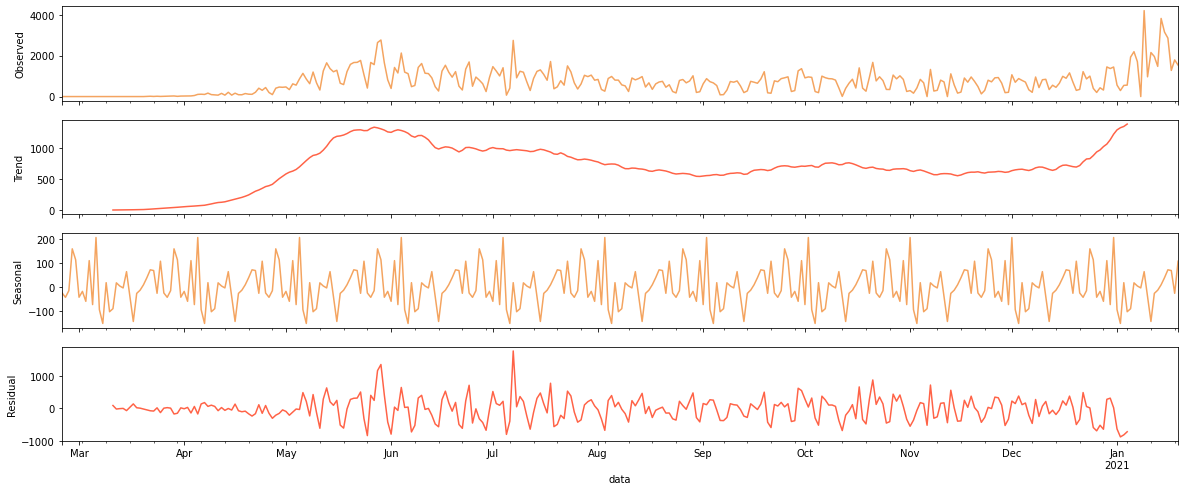

In [40]:
decomposicaoam = seasonal_decompose(covid_am[['data', 'casosNovos']].set_index('data'), model = 'aditive', freq=30)

fig, axes = plt.subplots(4, 1, sharex=True)

print('')
print(' - - - - - - - - - Decomposição da Serie Temporal de casos de COVID-19 no Amazonas (freq: 30) - - - - - - - - -')
decomposicaoam.observed.plot(ax=axes[0], legend=False, color='sandybrown', figsize=(20,8)) 
axes[0].set_ylabel('Observed')
decomposicaoam.trend.plot(ax=axes[1], legend=False, color='tomato')
axes[1].set_ylabel('Trend')
decomposicaoam.seasonal.plot(ax=axes[2], legend=False, color='sandybrown', figsize=(20,8))
axes[2].set_ylabel('Seasonal')
decomposicaoam.resid.plot(ax=axes[3], legend=False, color='tomato')
axes[3].set_ylabel('Residual');


      Decomposição da Serie Temporal de casos de COVID-19 No Amazonas (freq: 30)     
          ---- Modelo Multiplicativo com comparação dos resíduos no modelo aditivo ---- 


''

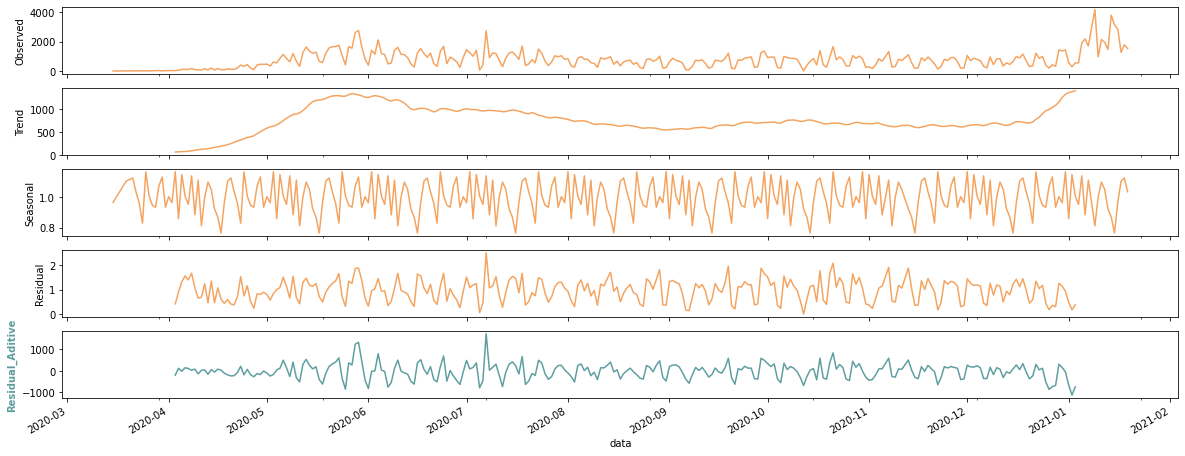

In [41]:
decomposicaobr = seasonal_decompose(covid_am[covid_am['casosNovos'] > 0][['data', 'casosNovos']].set_index('data').sort_index(), 
                                    model = 'multiplicative', freq=30)

decomposicaom = seasonal_decompose(covid_am[covid_am['casosNovos'] > 0][['data', 'casosNovos']].set_index('data').sort_index(), 
                                    model = 'aditive', freq=30)


fig, axes = plt.subplots(5, 1, sharex=True)

print('')
print('      Decomposição da Serie Temporal de casos de COVID-19 No Amazonas (freq: 30)     ')
print('          ---- Modelo Multiplicativo com comparação dos resíduos no modelo aditivo ---- ')

decomposicaobr.observed.plot(ax=axes[0], legend=False, color='sandybrown', figsize=(20,8)) 
axes[0].set_ylabel('Observed')
decomposicaobr.trend.plot(ax=axes[1], legend=False, color='sandybrown')
axes[1].set_ylabel('Trend')
decomposicaobr.seasonal.plot(ax=axes[2], legend=False, color='sandybrown', figsize=(20,8))
axes[2].set_ylabel('Seasonal')
decomposicaobr.resid.plot(ax=axes[3], legend=False, color='sandybrown')
axes[3].set_ylabel('Residual');

decomposicaom.resid.plot(ax=axes[4], legend=False, color='cadetblue')
axes[4].set_ylabel('Residual_Aditive', color = 'cadetblue', fontweight ='bold')
;

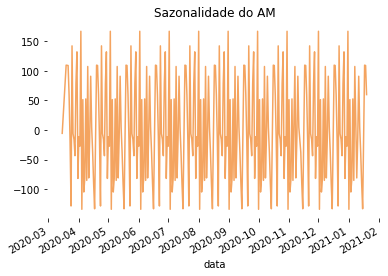

In [42]:

decomposicaom.seasonal.plot(color='sandybrown');
plt.title('Sazonalidade do AM')
sns.despine(bottom = True, left=True)

plt.show()

***

<b> <p>&#128204; CONCLUSÕES:</p></b>  

**1.** Na decomposição dos casos do Amazonas, é possível observar:

<b> - Série temporal não estacionária </b>

- Observamos clara tendência de "subida" principalmente no final de 2020

- Há sazonalidade. É possível observar picos e vales durante o tempo. Esta visualização fica ainda mais clara quando plotamos somente o componente "seasonal" da decomposição.

- O modelo aditivo apresenta resíduos relativamente menores do que o modelo multiplicativo

***


### TESTE DE ESTACIONARIEDADE


***

<b> <p>&#128206; NESTA SEÇÃO:</p></b>  

Identificar se a série é estacionária é de extrema importância para prosseguir com a correta escolha do modelo de previsão e/ou para identificar a necessidade de tratar os dados para realizar as as análises.

Por vezes, é possível identificar visualmente a estacionariedade da série, porém, na sua impossibilidade e também para maior assertividade, é possível realizar testes estatísticos.

Nesta seção, utilizaremos o teste adfuller da biblioteca StatsModels.

***

#### COVID BRASIL (exceção AM)

In [43]:
X = covid_br['casosNovos']
teste = adfuller(X)

print('ADF: %f' % teste[0])
print('Valor de P: %10f' % teste[1])
print('Valores Críticos:')
for i, value in teste[4].items():
    print('\t%s: %.3f' % (i, value))

ADF: -8.627915
Valor de P:   0.000000
Valores Críticos:
	1%: -3.431
	5%: -2.862
	10%: -2.567


####  COVID - AMAZONAS

In [44]:
X = covid_am['casosNovos']
teste = adfuller(X)

print('ADF: %f' % teste[0])
print('Valor de P: %f' % teste[1])
print('Valores Críticos:')
for i, value in teste[4].items():
    print('\t%s: %.3f' % (i, value))

ADF: -0.979987
Valor de P: 0.760493
Valores Críticos:
	1%: -3.451
	5%: -2.871
	10%: -2.572


***

<b> <p>&#128204; CONCLUSÕES:</p></b>  

Neste teste, de forma macro, interpretamos o resultado usando o valor de p-value:

- p-value < 0.05 rejeitamos a hipótese nula e então, consideramos que a série é estacionária.
- p-value > 0.05 sugete que a série não é estacionária

No caso do Brasil, o p-value resultou em 0.0, portanto, consideramos que a série é estacionária.

No caso do Amazonas, o p-value resultou em 0.76, portanto, consideramos que a séria não é estacionária.

***

### AUTOCORRELAÇÃO

***

<b> <p>&#128206; NESTA SEÇÃO:</p></b>  

A autocorrelação pode ser interpretada como uma observação num determinado instante está relacionada às observações passadas.

Utilizaremos, tanto para o Brasil como para os dados do Amazonas, o ACF e o PACF

***

#### ACF E PACF - BRASIL (EXCETO AM)

 
Autocorrelação e Autocorrelação Parcial dos casos de COVID no Brasil (exceto AM)


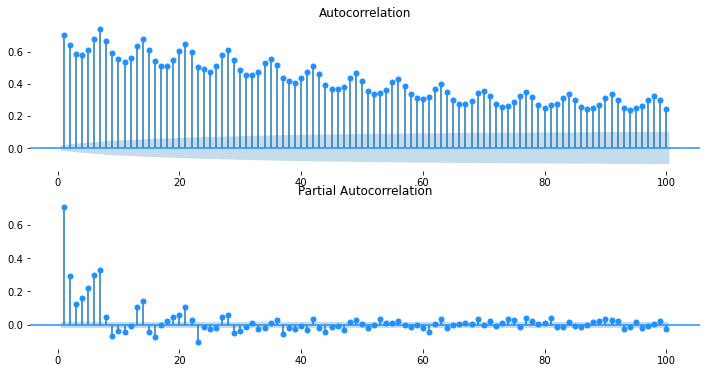

In [45]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6))

print(' ')
print('Autocorrelação e Autocorrelação Parcial dos casos de COVID no Brasil (exceto AM)')
plot_acf(covid_br['casosNovos'], lags= 100, zero=False, ax=ax1, color ='dodgerblue')
plt.box(False)
plot_pacf(covid_br['casosNovos'],lags= 100, zero=False, ax=ax2, color ='dodgerblue')
plt.box(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)


plt.show()

#### ACF E PACF - BRASIL (EXCETO AM)

 
Autocorrelação e Autocorrelação Parcial dos casos de COVID no Amazonas


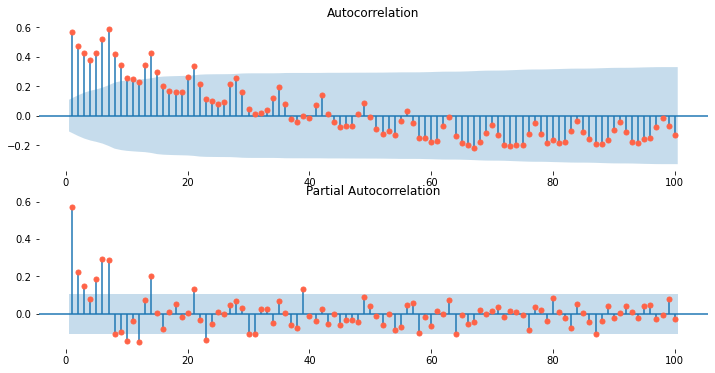

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6))
plt.box(False)

print(' ')
print('Autocorrelação e Autocorrelação Parcial dos casos de COVID no Amazonas')
plot_acf(covid_am['casosNovos'], lags= 100, zero=False, ax=ax1, markeredgecolor  = 'tomato', markerfacecolor ='tomato')
plot_pacf(covid_am['casosNovos'],lags= 100, zero=False, ax=ax2, markeredgecolor  = 'tomato', markerfacecolor ='tomato')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

plt.show()

***
<b> <p>&#128204; CONCLUSÕES:</p></b>  

Os lags da autocorrelação dos dados do Brasil se mantêm todos acima do nível de significância.
Quando analisamos o PACF, principalmente da metade ao final da série, os valores passam a praticamente 0, não indicando autocorrelação com os períodos anteriores (autocorrelação indireta)

Já nos dados do Amazonas, notamos na autocorrelação parcial que da metade em diante, a correlação se mostra negativa. Na autocorrelação parcial, diferentemente do restante do Brasil, há pequenos pontos acima do nível de significância.

***

## PREVISÕES DE SÉRIES TEMPORAIS

***

<b> <p>&#128206; NESTA SEÇÃO:</p></b>  

Nesta seção serão realizadas as previsões tanto para os dados do Brasil como para Amazonas.

Serão utilizados os modelos: Holt Winters, ARIMA, SARIMA e Phophet.

***

### HOLT WINTERS 

#### HOLT WINTERS - AM

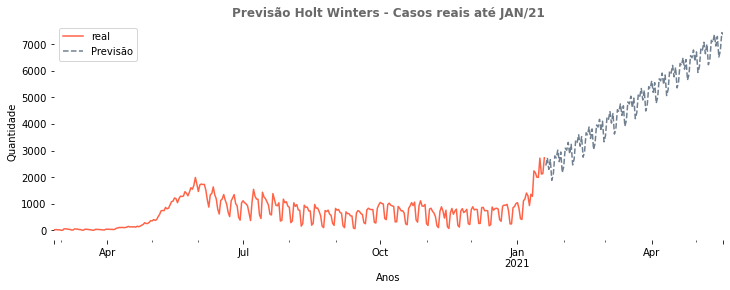

In [47]:
fit1 = ExponentialSmoothing(covid_am[['data', 'casosNovos']].set_index('data').sort_values(by='data'), 
                            seasonal_periods=7,
                            trend='additive', 
                            seasonal='additive').fit()

fit1.fittedvalues.plot(color='tomato', label = 'real', figsize=(12,4))
fit1.forecast(120).plot(color='slategrey', style ='--', label='Previsão')
plt.title('Previsão Holt Winters - Casos reais até JAN/21', color='dimgrey', fontweight='bold')
plt.legend()
sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10)

plt.show()

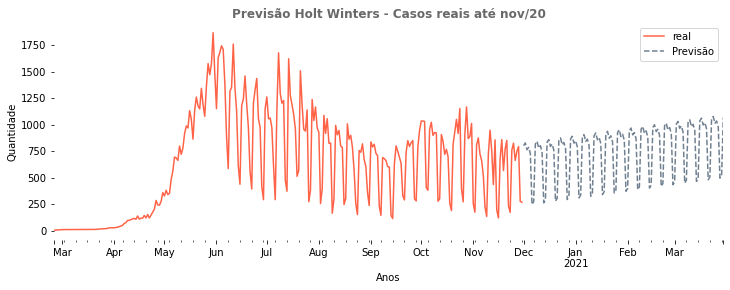

In [48]:
fit1 = ExponentialSmoothing(covid_am[['data', 'casosNovos']][:-50].set_index('data').sort_values(by='data'), 
                            seasonal_periods=7,
                            trend='additive', 
                            seasonal='additive').fit()

fit1.fittedvalues.plot(color='tomato', label = 'real', figsize=(12,4))
fit1.forecast(120).plot(color='slategrey', style ='--', label='Previsão')
plt.title('Previsão Holt Winters - Casos reais até nov/20', color='dimgrey', fontweight='bold')
plt.legend()
sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10)

plt.show()

 
Previsão dos casos de Covid19 no Amazonas dos meses de set a dez/20, 
comparando com os valores reais destes mesmos meses 



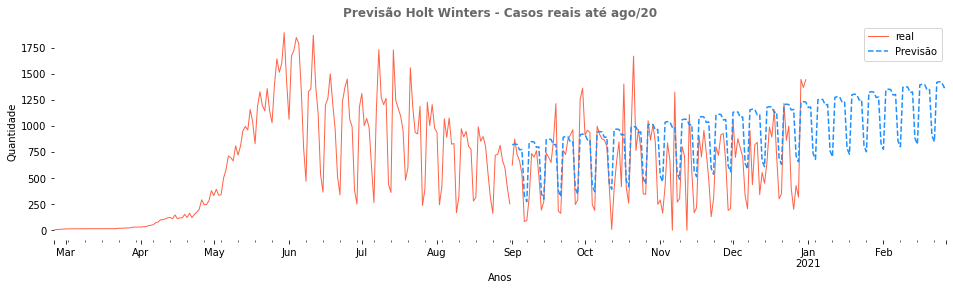

In [49]:
fit_covid = ExponentialSmoothing(covid_am[['data', 'casosNovos']][:-141].set_index('data').sort_values(by='data'), 
                            seasonal_periods=7,
                            trend='additive', 
                            seasonal='additive').fit()


print(' \nPrevisão dos casos de Covid19 no Amazonas dos meses de set a dez/20, \ncomparando com os valores reais destes mesmos meses \n')
fit_covid.fittedvalues.plot(color='tomato', label = 'real', figsize=(16,4), linewidth = 1)

sns.lineplot(data=covid_am[['data', 'casosNovos']][189:-19].sort_values(by='data'), x='data', y='casosNovos',
            color='tomato', linewidth = 1)

fit_covid.forecast(180).plot(color='dodgerblue', style ='--', label='Previsão')

plt.title('Previsão Holt Winters - Casos reais até ago/20', color='dimgrey', fontweight='bold')
plt.legend()
sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10)

plt.show()

***
<b> <p>&#128204; CONCLUSÕES:</p></b>  

O Holt Winters é bastante útil para prever séries temporais quando há tendência e sazonalidade. Por este motivo, foi utilizado apenas nos dados do Amazonas, visto que conforme teste de estacionariedade, Brasil é estacionário.

Conforme os modelos treinados, o Holt Winters se mostrou bastante sensível a outliers, assim, foram testados períodos diferentes e escolhido o melhor adequado aos testes, no caso, o último modelo (treino até set e teste de set em diante).

***



## ARIMA

***

<b> <p>&#128206; NESTA SEÇÃO:</p></b>  

Nas duas próximas seções foram treinados os modelos ARIMA e AUTO_ARIMA (com parâmetro sazonal: SARIMA), para as duas bases de dados.

***

#### ARIMA - AMAZONAS

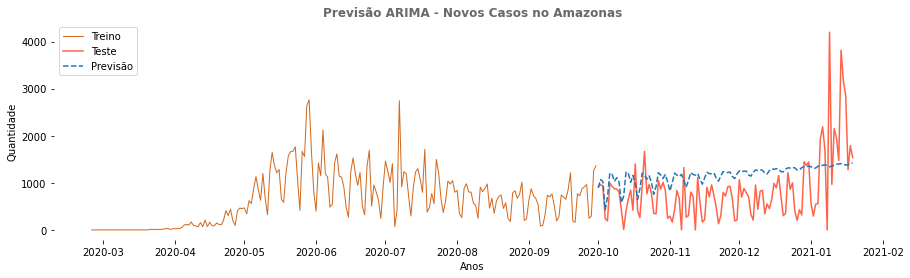

In [50]:
# Separando os dados de treino e teste
treinoam = covid_am[['data', 'casosNovos']][:-111].set_index('data').sort_values(by='data')
testeam = covid_am[['data', 'casosNovos']][219:].set_index('data').sort_values(by='data')

# Treinando o modelo
modelo_arimaam = ARIMA(treinoam['casosNovos'].values, order=[15,1,0])
modelo_arima_treinadoam = modelo_arimaam.fit()
previsaoam = modelo_arima_treinadoam.forecast(111)[0]

# Comparando
plt.figure(figsize=(15, 4))

testeam['previsao'] = previsaoam

sns.lineplot(x='data', y='casosNovos', data = treinoam, label ='Treino', color= 'chocolate', linewidth = 1)
sns.lineplot(x='data', y='casosNovos', data = testeam, color='tomato', label='Teste', linewidth = 1.5) 
sns.lineplot(x='data', y='previsao', data = testeam, label = 'Previsão', linestyle = '--')

plt.title('Previsão ARIMA - Novos Casos no Amazonas', color='dimgrey', fontweight='bold')
plt.legend()
sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10)

plt.show()

#### ARIMA - BRASIL (exceto AM)

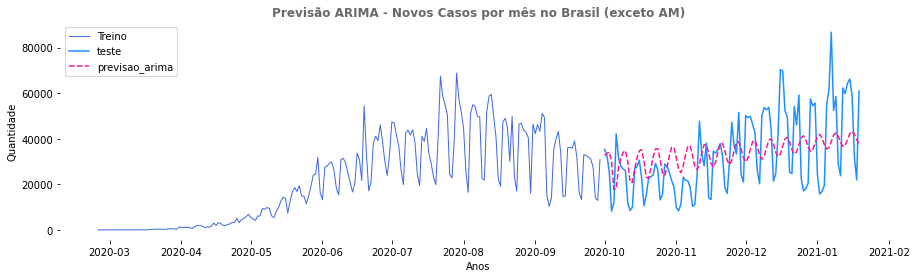

In [51]:
covid_br.sort_values(by='data', inplace=True)

treino_br = covid_br[covid_br['data'] < '2020-09-30'][['data', 'casosNovos']].set_index('data').groupby(level=0).sum()
teste_br = covid_br[covid_br['data'] > '2020-09-30'][['data', 'casosNovos']].set_index('data').groupby(level=0).sum()

# Treinando o modelo
modelo_arima_br = ARIMA(treino_br['casosNovos'].values, order=[8,1,5])
modelo_arima_treinado_br = modelo_arima_br.fit()
previsao_br = modelo_arima_treinado_br.forecast(111)[0]

plt.figure(figsize=(15, 4))

teste_br['previsao_arima'] = previsao_br

sns.lineplot(x='data', y='casosNovos', data = treino_br, label ='Treino', linewidth = 1, color='royalblue')
sns.lineplot(x='data', y='casosNovos', data = teste_br, label='teste', linewidth = 1.5, color='dodgerblue') 
sns.lineplot(x='data', y='previsao_arima', data=teste_br, label = 'previsao_arima', linestyle = '--',
            color='deeppink')

plt.title('Previsão ARIMA - Novos Casos por mês no Brasil (exceto AM)', color='dimgrey', fontweight='bold')
plt.legend()
sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10)

plt.show()

### SARIMA

#### COVID - BRASIL (exceto Amazonas)

In [52]:
# Separando os dados de treino e teste
treino_sarima_br = covid_br[covid_br['data'] < '2020-09-30'][['data', 'casosNovos']].set_index('data').groupby(level=0).sum()
teste_sarima_br = covid_br[covid_br['data'] > '2020-09-30'][['data', 'casosNovos']].set_index('data').groupby(level=0).sum()

sarima_br = auto_arima(treino_sarima_br['casosNovos'].values, error_action='ignore', trace=True,
                      seasonal=True, m =7)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4613.760, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4493.059, Time=0.48 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4543.265, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4611.807, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=4615.753, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=4467.345, Time=0.71 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=4509.397, Time=0.41 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=4507.462, Time=0.22 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=4524.596, Time=0.20 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=4496.778, Time=0.34 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=4455.622, Time=1.16 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=4437.559, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=4570.365, Time=0.27 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : 

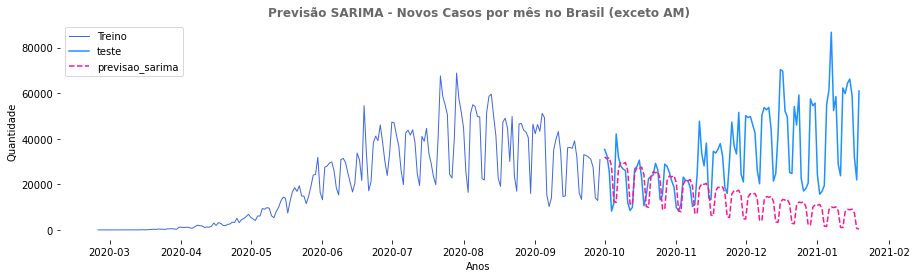

In [53]:
previsao_sarima_br = sarima_br.predict(111)
teste_sarima_br['previsao_sarima'] = previsao_sarima_br

plt.figure(figsize=(15, 4))

sns.lineplot(x='data', y='casosNovos', data = treino_sarima_br, label ='Treino', linewidth = 1, color='royalblue')
sns.lineplot(x='data', y='casosNovos', data = teste_sarima_br, label='teste', linewidth = 1.5, color='dodgerblue') 
sns.lineplot(x='data', y='previsao_sarima', data=teste_sarima_br, label = 'previsao_sarima', linestyle = '--',
            color='deeppink')

plt.title('Previsão SARIMA - Novos Casos por mês no Brasil (exceto AM)', color='dimgrey', fontweight='bold')
plt.legend()
sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10)

plt.show()


#### COMPARANDO ARIMA E AUTO ARIMA - BRASIL (exceto Amazonas)

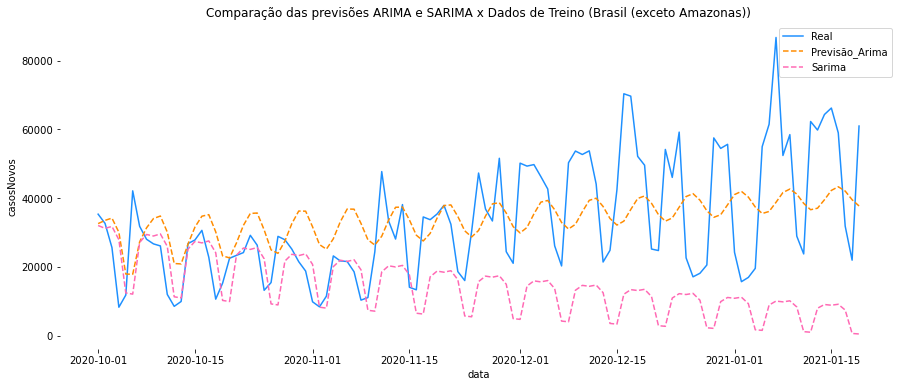

In [54]:
plt.figure(figsize=(15, 6))

plt.title('Comparação das previsões ARIMA e SARIMA x Dados de Treino (Brasil (exceto Amazonas))')

sns.lineplot(x='data', y='casosNovos', data = teste_br, label='Real', linewidth = 1.5, color='dodgerblue' ) 
sns.lineplot(x='data', y='previsao_arima', data = teste_br, label = 'Previsão_Arima', linestyle ='--',
            color='darkorange')
sns.lineplot(x='data', y='previsao_sarima', data = teste_sarima_br, label = 'Sarima', linestyle ='--',
            color='hotpink')
sns.despine(bottom=True, left=True)


In [55]:
resultado_arima_br = mean_squared_error(teste_br['casosNovos'], teste_br['previsao_arima'])
resultado_sarima_br = mean_squared_error(teste_sarima_br['casosNovos'], teste_sarima_br['previsao_sarima'])

print(f'Mean Squared Error - Arima: {resultado_arima_br}')
print(f'Mean Squared Error - Sarima: {resultado_sarima_br}')

Mean Squared Error - Arima: 252396883.21033454
Mean Squared Error - Sarima: 788705775.0323668


#### COVID - AMAZONAS

In [56]:
# Separando os dados de treino e teste
treino_autoarima_am = covid_am[['data', 'casosNovos']][:-111].set_index('data').sort_values(by='data')
teste_autoarima_am = covid_am[['data', 'casosNovos']][219:].set_index('data').sort_values(by='data')

autoarima_am = auto_arima(treino_autoarima_am['casosNovos'].values, error_action='ignore', trace = True,
                       seasonal = True, m=7)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3281.936, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3213.124, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3183.259, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3279.979, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=3227.773, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=3126.097, Time=0.69 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=3146.325, Time=0.35 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=3128.069, Time=1.16 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=3150.530, Time=1.10 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=3127.620, Time=0.77 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3215.873, Time=0.44 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=3127.0

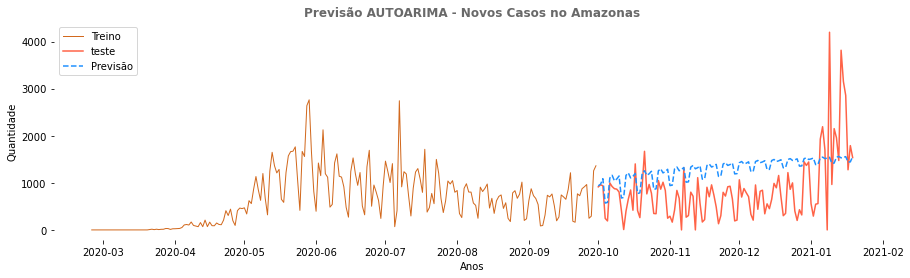

In [57]:
previsao_autoarima_am = autoarima_am.predict(111)
teste_autoarima_am['auto_arima'] = previsao_autoarima_am

plt.figure(figsize=(15, 4))

sns.lineplot(x='data', y='casosNovos', data = treino_autoarima_am, label ='Treino', color= 'chocolate', 
             linewidth = 1)
sns.lineplot(x='data', y='casosNovos', data = teste_autoarima_am, label='teste', linewidth = 1.5,
            color = 'tomato') 
sns.lineplot(x='data', y='auto_arima', data = teste_autoarima_am, label = 'Previsão', linestyle='--',
            color = 'dodgerblue')

plt.title('Previsão AUTOARIMA - Novos Casos no Amazonas', color='dimgrey', fontweight='bold')
plt.legend()
sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10)

plt.show()



#### COMPARANDO ARIMA E AUTO ARIMA - AMAZONAS

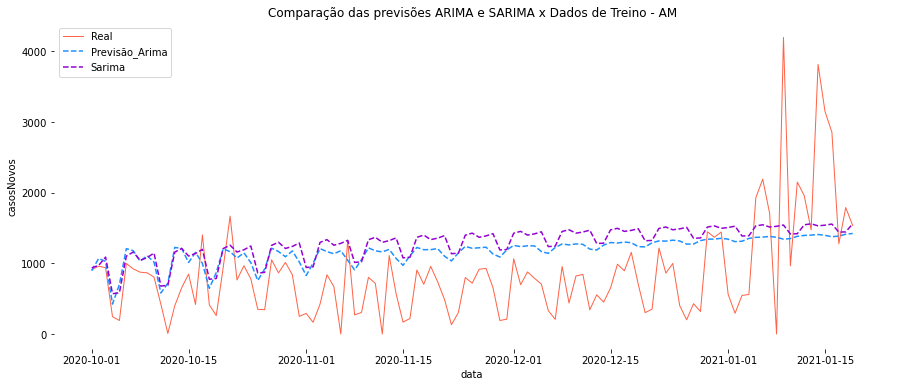

In [58]:
plt.figure(figsize=(15, 6))

plt.title('Comparação das previsões ARIMA e SARIMA x Dados de Treino - AM')

sns.lineplot(x='data', y='casosNovos', data = testeam, label='Real', linewidth = 1 , color='tomato') 
sns.lineplot(x='data', y='previsao', data = testeam, label = 'Previsão_Arima', linestyle ='--',
            color='dodgerblue')
sns.lineplot(x='data', y='auto_arima', data = teste_autoarima_am, label = 'Sarima', linestyle ='--',
            color = 'darkviolet')
sns.despine(bottom=True, left=True)


In [59]:
resultado_arima_am = mean_squared_error(testeam['casosNovos'], testeam['previsao'])
resultado_autoarima_am = mean_squared_error(teste_autoarima_am['casosNovos'], teste_autoarima_am['auto_arima'])

print(f'Mean Squared Error - Arima: {resultado_arima_am}')
print(f'Mean Squared Error - Sarima: {resultado_autoarima_am}')

Mean Squared Error - Arima: 509753.11190493195
Mean Squared Error - Sarima: 588539.4738931094


***

<b> <p>&#128204; CONCLUSÕES:</p></b>  

Tanto o ARIMA como o SARIMA não apresentaram performance muito boa em relação aos dados de teste.

Foram testados os erros através do EQM (erro quadrático médio), obtendo:

<b> Para os dados do Brasil: </b>

Mean Squared Error - Arima: 252.396.883.21033454

Mean Squared Error - Sarima: 788.705.775.0323668

<b>Para Amazonas:</b>

Mean Squared Error - Arima: 509753.11190493195

Mean Squared Error - Sarima: 588539.4738931094


Para o Brasil, o ARIMA apresentou erro bastante diferente do SARIMA, portanto, a inclusão manual dos parâmetros (e de acordo com as análises de decomposição de autocorrelação) foram mais assertivas. O mesmo cenário ocorreu nos dados do Amazonas, porém com a diferença do EQM um pouco menor.

***

## PROPHET

***

<b> <p>&#128206; NESTA SEÇÃO:</p></b>  

Phophet é um software desenvolvido pelo Facebook para previsão de séries temporais baseado no modelo aditivo.

Foi utilizado o método nas duas bases de dados e analisado sua performance visualmente.

*** 

### PROPHET - AM

In [60]:
treinoam = covid_am[['data', 'casosNovos']][:-111].set_index('data').sort_values(by='data')
testeam = covid_am[['data', 'casosNovos']][219:].set_index('data').sort_values(by='data')

# reset do indice
treinoam.reset_index(inplace=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


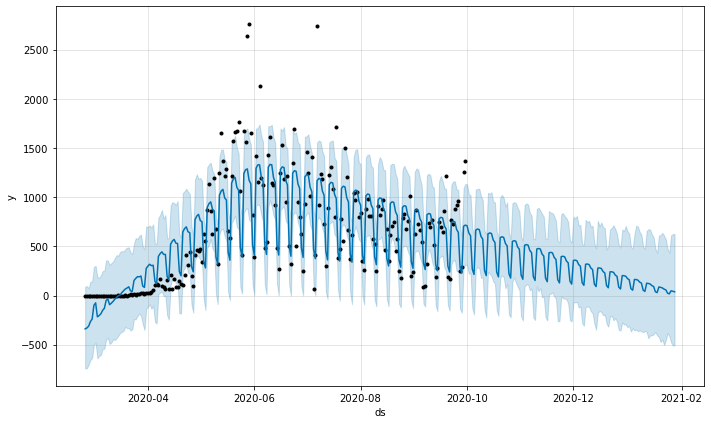

In [61]:
ppt = Prophet(seasonality_mode='multiplicative') 


# renomeando as colunas
treinoam.rename(columns={'data' : 'ds', 'casosNovos': 'y'}, inplace=True)

# Fit
prophet_treinado_am = ppt.fit(treinoam)

# Criando datas futuras
future = prophet_treinado_am.make_future_dataframe(periods=120, freq='d')

# Treinando o modelo
resultado_prophet_am = prophet_treinado_am.predict(future)

# Plotando
prophet_treinado_am.plot(resultado_prophet_am);


### PROPHET - Brasil

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


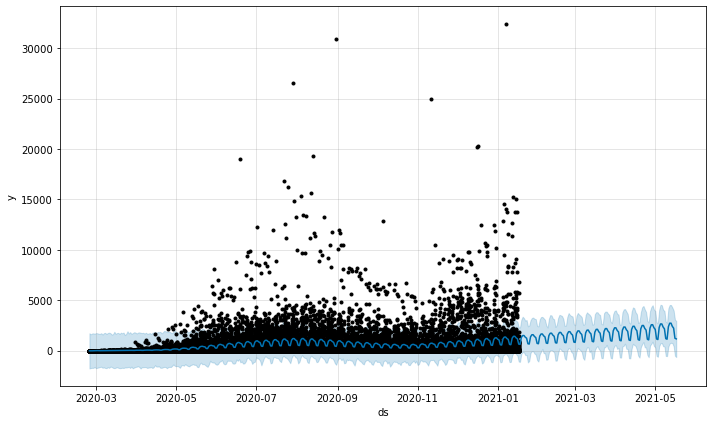

In [62]:
treinobr_prophet = covid_br[['data', 'casosNovos']][:-111].set_index('data').sort_values(by='data')
testetreinobr_prophet = covid_br[['data', 'casosNovos']][219:].set_index('data').sort_values(by='data')

# reset do indice
treinobr_prophet.reset_index(inplace=True)

ppt = Prophet(seasonality_mode='multiplicative') 


# renomeando as colunas
treinobr_prophet.rename(columns={'data' : 'ds', 'casosNovos': 'y'}, inplace=True)

# Fit
prophet_treinado_br = ppt.fit(treinobr_prophet)

# Criando datas futuras
future = prophet_treinado_br.make_future_dataframe(periods=120, freq='d')

# Treinando o modelo
resultado_prophet_br = prophet_treinado_br.predict(future)

# Plotando
prophet_treinado_br.plot(resultado_prophet_br);


***

<b> <p>&#128204; CONCLUSÕES:</p></b>  

Para os dados do Brasil, o modelo se ajustou relativamente melhor do que nos dados do Amazonas.

No Br, é possível visualizar sazonalidades com tendência de queda, enquanto nos dados do Amazonas, leve tendência de subida.

Em ambos os casos, o modelo treinado de forma simples, não conseguiu se adequar corremante aos outliers.

***

## PREVISÕES NO AMAZONAS

***

<b> <p>&#128206; NESTA SEÇÃO:</p></b>  

Tendo como foco as análises dos dados de COVID do Brasil comparado aos dados de Amazonas, nesta seção, vamos avaliar os leitos, internações e novos casos.

Foram escolhidos os modelos que melhor performou na previsão e utilizado para prever a quantidade de leitos e a quantidade de internações futuras.

***

### LEITOS E INTERNAÇÕES

In [63]:
leitos_am = leitos[leitos['uf'] == 'AM'][['data', 'qt_leitos']].set_index('data')
internacoes_am = internacoes[internacoes['uf'] == 'AM'][['data', 'qt_internacoes']].set_index('data')

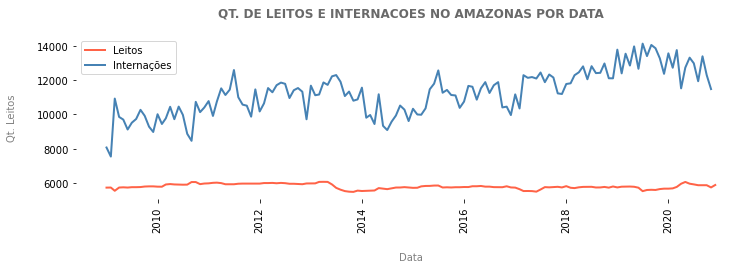

In [64]:
plt.figure(figsize=(12, 3))
sns.lineplot(data = leitos_am, x='data', y='qt_leitos', color = 'tomato', linewidth=2,ci=False,
            label ='Leitos')
sns.lineplot(data = internacoes_am, x='data', y='qt_internacoes', color = 'steelblue', linewidth=2,ci=False,
            label = 'Internações')


plt.title('QT. DE LEITOS E INTERNACOES NO AMAZONAS POR DATA', color = 'dimgrey', fontweight='bold', size = 12, pad = 20)
plt.xlabel('Data', color='grey', labelpad=20)
plt.ylabel('Qt. Leitos', color='grey', labelpad=20)
plt.grid(False)
plt.xticks(rotation=90)
sns.despine(bottom=True, left=True)


plt.show()

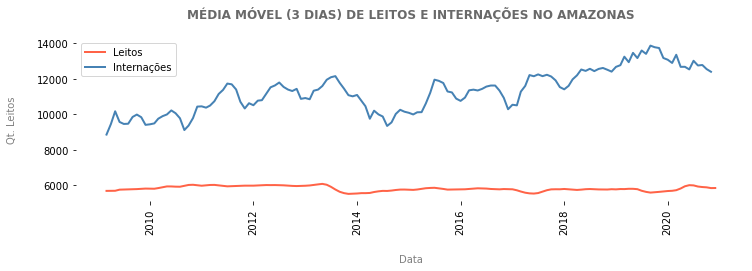

In [65]:
leitos_am_mm = pd.DataFrame(leitos_am['qt_leitos'].rolling(3).mean())
internacoes_am_mm = pd.DataFrame(internacoes_am['qt_internacoes'].rolling(3).mean())

plt.figure(figsize=(12, 3))
sns.lineplot(data = leitos_am_mm, x='data', y='qt_leitos', color = 'tomato', linewidth=2,ci=False,
            label ='Leitos')
sns.lineplot(data = internacoes_am_mm, x='data', y='qt_internacoes', color = 'steelblue', linewidth=2,ci=False,
            label = 'Internações')


plt.title('MÉDIA MÓVEL (3 DIAS) DE LEITOS E INTERNAÇÕES NO AMAZONAS', color = 'dimgrey', fontweight='bold', size = 12, pad = 20)
plt.xlabel('Data', color='grey', labelpad=20)
plt.ylabel('Qt. Leitos', color='grey', labelpad=20)
plt.grid(False)
plt.xticks(rotation=90)
sns.despine(bottom=True, left=True)


plt.show()

### INTERNAÇÕES

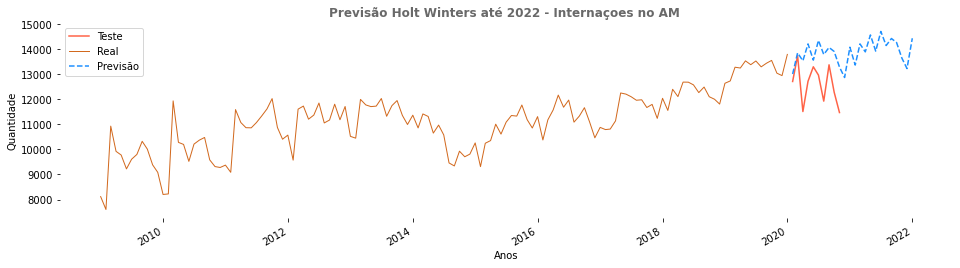

In [66]:
# Separando os dados de treino e teste
internacoes_dados_treino = internacoes_am.loc[internacoes_am_mm.index < '2020-01-31']
internacoes_dados_teste = internacoes_am.loc[internacoes_am_mm.index > '2020-01-31']


fit_internacoes = ExponentialSmoothing(internacoes_dados_treino, 
                            seasonal_periods=12,
                            trend='additive', 
                            seasonal='additive').fit()


sns.lineplot(data = internacoes_dados_teste, x='data', y='qt_internacoes', linewidth = 1.5,
            color = 'tomato', label='Teste')
fit_internacoes.fittedvalues.plot( label = 'Real', figsize=(16,4), linewidth = 1, color='chocolate')
fit_internacoes.forecast(24).plot(color='dodgerblue', style ='--', label='Previsão', linestyle='--')

plt.title('Previsão Holt Winters até 2022 - Internaçoes no AM ', color='dimgrey', fontweight='bold')
plt.legend()
sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10)

plt.show()


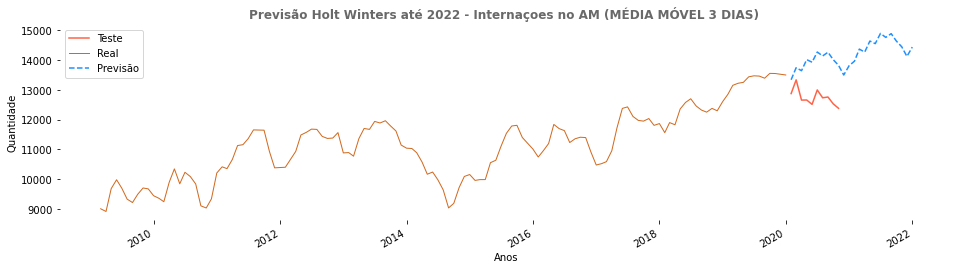

In [67]:
# Separando os dados de treino e teste
internacoes_dados_treino = internacoes_am_mm.loc[internacoes_am_mm.index < '2020-01-31'].dropna()
internacoes_dados_teste = internacoes_am_mm.loc[internacoes_am_mm.index > '2020-01-31'].dropna()


fit1 = ExponentialSmoothing(internacoes_dados_treino, 
                            seasonal_periods=12,
                            trend='additive', 
                            seasonal='additive').fit()


sns.lineplot(data = internacoes_dados_teste, x='data', y='qt_internacoes', linewidth = 1.5,
            color = 'tomato', label='Teste')
fit1.fittedvalues.plot( label = 'Real', figsize=(16,4), linewidth = 1, color='chocolate')
fit1.forecast(24).plot(color='dodgerblue', style ='--', label='Previsão', linestyle='--')

plt.title('Previsão Holt Winters até 2022 - Internaçoes no AM (MÉDIA MÓVEL 3 DIAS) ', color='dimgrey', fontweight='bold')
plt.legend()
sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10)

plt.show()


### LEITOS

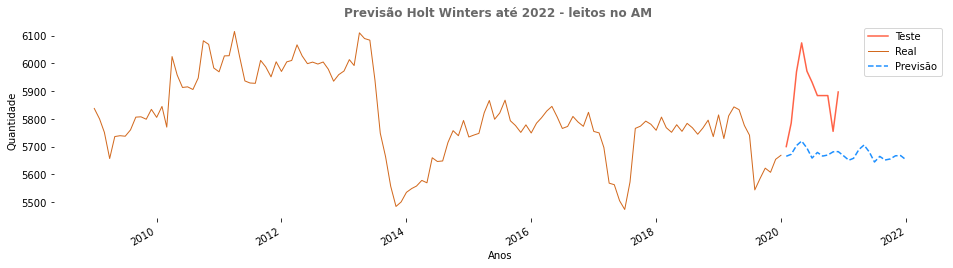

In [68]:
# Separando os dados de treino e teste
leitos_dados_treino = leitos_am.loc[leitos_am.index < '2020-02-01']
leitos_dados_teste = leitos_am.loc[leitos_am.index > '2020-01-01']


fit_leitos = ExponentialSmoothing(leitos_dados_treino, 
                            seasonal_periods=12,
                            trend='multiplicative', 
                            seasonal='multiplicative').fit()


sns.lineplot(data = leitos_dados_teste, x='data', y='qt_leitos', linewidth = 1.5,
            color = 'tomato', label='Teste')

fit_leitos.fittedvalues.plot( label = 'Real', figsize=(16,4), linewidth = 1, color='chocolate')

fit_leitos.forecast(24).plot(color='dodgerblue', style ='--', label='Previsão', linestyle='--')

plt.title('Previsão Holt Winters até 2022 - leitos no AM ', color='dimgrey', fontweight='bold')
plt.legend()
sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10)

plt.show()


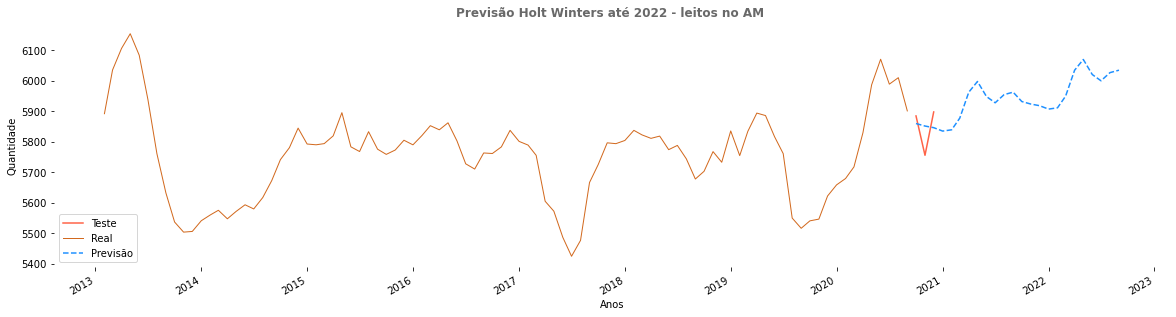

In [69]:
# Separando os dados de treino e teste
leitos_dados_treino = leitos_am.loc[(leitos_am.index > '2013-01-01') & (leitos_am.index < '2020-10-01' )]
leitos_dados_teste = leitos_am.loc[leitos_am.index > '2020-09-01']


fit_leitos = ExponentialSmoothing(leitos_dados_treino, 
                            seasonal_periods=12,
                            trend='additive', 
                            seasonal='additive').fit()


sns.lineplot(data = leitos_dados_teste, x='data', y='qt_leitos', linewidth = 1.5,
            color = 'tomato', label='Teste')

fit_leitos.fittedvalues.plot( label = 'Real', figsize=(20,5), linewidth = 1, color='chocolate')

fit_leitos.forecast(24).plot(color='dodgerblue', style ='--', label='Previsão', linestyle='--')

plt.title('Previsão Holt Winters até 2022 - leitos no AM ', color='dimgrey', fontweight='bold')
plt.legend()
sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10)

plt.show()


***

<b> <p>&#128204; CONCLUSÕES:</p></b>  

Nos casos de internações o modelo Holt Winters preveu quantidades um pouco maiores em relação aos dados de teste (influenciado pelo aumento registrado no final de 2019). O modelo se mostrou eficaz na identificação de sazonalidade.

Nos dados referente a leitos, o modelo Holt Winters performou relativamente bem no modelo aditivo.
***

### COVID x LEITO x INTERNAÇÕES

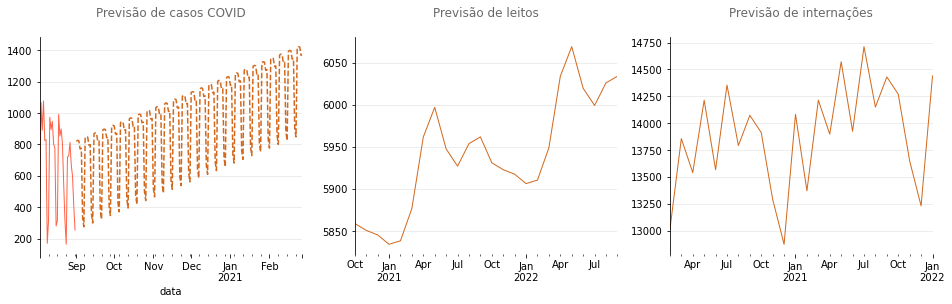

In [70]:
fit_covid = ExponentialSmoothing(covid_am[['data', 'casosNovos']][:-141].set_index('data').sort_values(by='data'), 
                            seasonal_periods=7,
                            trend='additive', 
                            seasonal='additive').fit()

#plot
plt.figure(figsize=(25, 20))

### COVID forecast
ax1 = plt.subplot(1, 3, 1)
fit_covid.fittedvalues[160:].plot(color='tomato', label = 'real', figsize=(16,4), linewidth = 1)
fit_covid.forecast(180).plot(color='chocolate', style ='--', label='Previsão_COVID')
plt.title('Previsão de casos COVID', color = 'dimgrey', pad = 20)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax1.set_axisbelow(True)


#leitos forecast
ax2 = plt.subplot(1, 3, 2)
fit_leitos.forecast(24).plot(label='Previsão_leitos', linewidth= 1, color='chocolate' )
plt.title('Previsão de leitos', color = 'dimgrey', pad = 20)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax2.set_axisbelow(True)

#Internacoes forecast
ax3= plt.subplot(1, 3, 3)

fit_internacoes.forecast(24).plot(color='chocolate',  label='Previsão_internacoes', linewidth= 1)

plt.title('Previsão de internações', color = 'dimgrey', pad = 20)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

ax3.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax3.set_axisbelow(True)

plt.rc('ytick', labelsize=9, color='grey') 
plt.rc('xtick', labelsize=9, color='grey') 

plt.rc('axes', axisbelow=True)

plt.show()

*** 
<b> <p>&#128204; CONCLUSÕES:</p></b>  

Nas três previsões foi utilizado o Holt Winters: COVID, leitos e internações.

<b> COVID: </b> O modelo prevê sazonalidade com tendência ao aumento de casos ao longo do tempo

<b> LEITOS: </b> A previsão do modelo é de oscilações ao longo dos meses com tendência de aumento.

<b> INTERNAÇÕES </b> Com forte sazonalide, o modelo prevê que as internações tendem a grandes oscilações, principalmente a cada ciclo de 12 meses (impulsionado pelo aumento devido a COVID-19)

***

## CONCLUSÃO

Considerando os dados até 19/01/21 com determinadas premissas utilizadas para análise, podemos concluir:

**LEITOS**

- Em 2019, o estado do Amazonas ocupava a segunda pior posição em relação a leitos por população (leitos a cada 1k de habitantes). Em 2020 figurou como o estado com menor quantidade de leitos a cada mil habitantes.
<br>

**COVID**

- Amazonas ocupa a nona posição em relação a contágio de COVID-19 a cada mil habitantes, entretanto, é o segundo pior estado em mortalidade e o maior estado na região Norte em letalidade.

- Em números absolutos, de todo o Brasil, a região Norte é a que possui menor quantidade de contaminados, porém, é a penúltima região em relação a óbitos.

- Quando analisada a série temporal de contaminados, nota-se que ao longo dos meses Amazonas registrou quantidade de contaminações "mais lineares". OU seja, o restante do Brasil se manteve com maiores registros por mais tempo, enquanto AM enfrentou maior quantidade no início da pandemia do Corona, manteve o número de novos casos dentro de uma média e registrou forte aumento no final de 2020.

**PREVISÕES**

- Nos dados do Amazonas, de todos os modelos testados, o Holt Winters se mostrou melhor ajustado. Notou-se que o método é bastante sensível a tendências recentes, portanto, para os dados de treino, foi considerado periódo que o estado mantinha a quantidade de contaminações linear, ou seja, set/20. Comparando as previsões com os dados de teste, este periódo foi o que se mostrou mais coerente: sazonalidade e tendência de aumento. 

- O mesmo método foi utilizado nas previsões de leitos e internações. Quando analisadas as três previsões, nota-se:

    - Aumento de contaminações por COVID-19
    - Aumento da quantidade de leitos (forte tendência devido ao aumento no número em 2020 devido a pandemia - quando houve disponibilização de novos leitos e hospitais de campanha) *
    - Internações oscilando, mas com leve tendência a aumento

Obs: Nesta análise, a previsão de aumento na quantidade de leitos não quer dizer que haverá disponibilização de novos leitos, mas que a previsão é da necessidade deste aumento, uma vez que haverá novos contaminados (relacionar ao aumento de leitos em 2020 devido a pandemia do Coronavirus).

<br>

